# Generate Light Curves

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

#!directory = "/storage/experiments/2021/0711_bourka_stiavnica"
#!directory = "/storage/experiments/2021/0714_bourka_stiavnica_nocni"
directory = "/storage/experiments/2021/0605_bourka_radosovice"
directory = "/storage/experiments/2021/0609_bourka_sobeslav"
#!directory = "/storage/experiments/2021/0623_bourka_jirny"
#!directory = "/storage/experiments/2021/0629_bourka_radosovice"
#!directory = "/storage/experiments/2021/0629_bourka_zdiby"
#!directory = "/storage/experiments/2021/0709_bourka_stiavnica"
directory = "/storage/experiments/2021/0711_bourka_stiavnica"
directory = "/storage/experiments/2021/0713_bourka_exit29_D8"
directory = "/storage/experiments/2021/0714_bourka_martin"
directory = "/storage/experiments/2021/0714_bourka_sobeslav"
#!directory = "/storage/experiments/2021/0714_bourka_stiavnica_nocni"
#!directory = "/storage/experiments/2021/0717_bourka_kubinska_hola"
#!directory = "/storage/experiments/2021/0808_bourka_zdiby"
#directory = "/storage/experiments/2021/test"
directory = "/storage/experiments/2021/0725_bourka_ratmirov"
directory = "/storage/experiments/2021/0726_bourka_zabori"
directory = "/storage/experiments/2021/0803_bourka_votice"
directory = "/storage/experiments/2021/0807_bourka_sobeslav"
directory = "/storage/experiments/2021/0815_bourka_veseli_auto1"
directory = "/storage/experiments/2021/0815_bourka_veseli_auto0"
directory = "/storage/experiments/2021/0816_bourka_sobeslav"
directory = "/storage/experiments/2021/0822_bourka_sobeslav_auto0"

directory = "/storage/experiments/2021/0609_bourka_sobeslav"


In [128]:
for f in glob.iglob(directory + "/video/*.mp4"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]

        b = np.zeros(30000)

        cap = cv2.VideoCapture(f)

        count = 0
        first = True
        while True:
            ret,frame = cap.read()

            if (not ret):
                break

            frame_old = frame
            crop_img = frame[0:859, 0:927] #frame[0:768, 0:1024]
            b[count] = crop_img.ravel().sum() / (860 * 928)
            
            #if (b[count] == 0):
            #    break
            count = count + 1

        cap.release()
        print(f, count)
        pd.DataFrame(b[:count]).to_csv(f + '.csv')
        
    except Exception as e: 
        print (e)
        pass
print('end')

KeyboardInterrupt: 

# Plot Light Curves

/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-38-03.mp4.csv
/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-44-22.mp4.csv
/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-48-35.mp4.csv
/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-55-02.mp4.csv


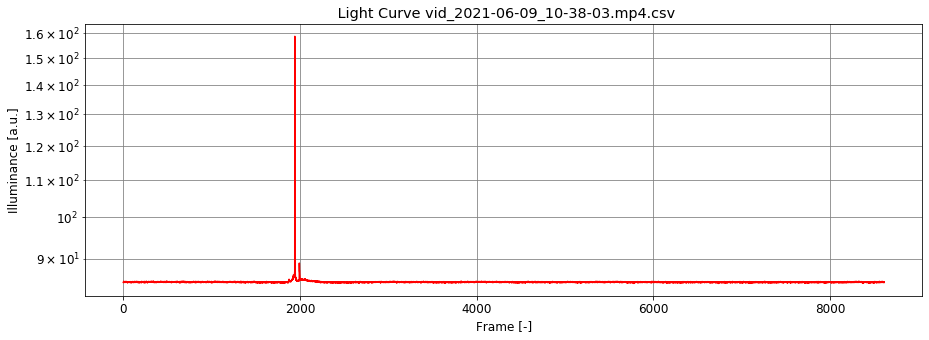

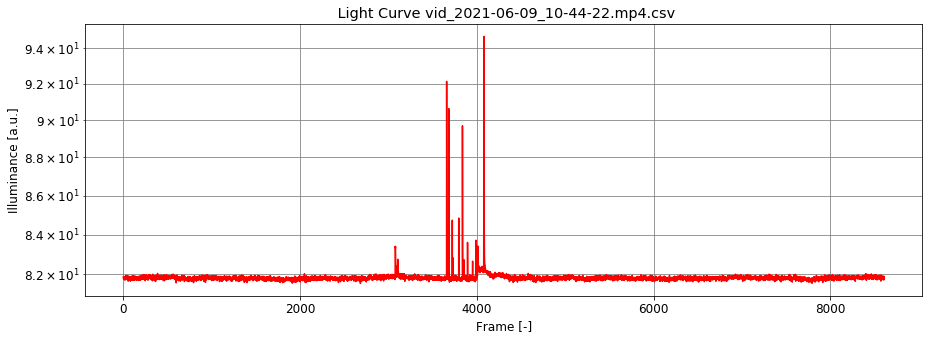

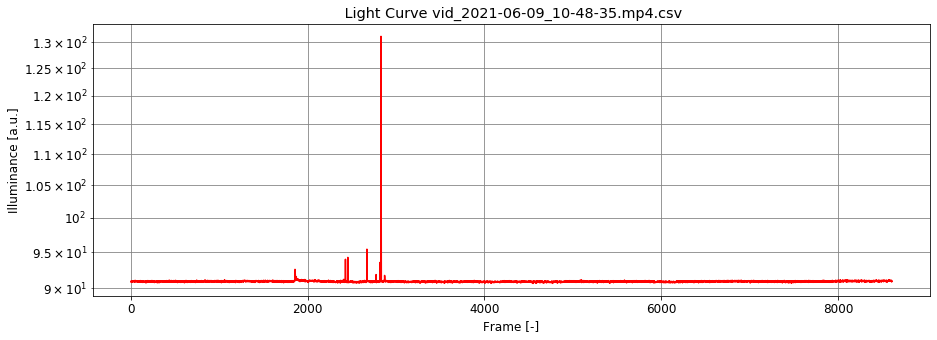

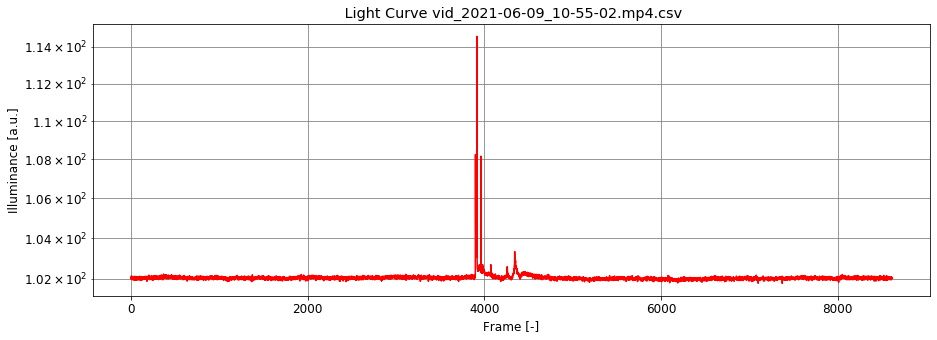

In [97]:
for f in glob.iglob(directory + "/video/*.mp4.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        print(f)
        y = pd.read_csv(f)

        plt.figure(figsize=(15,5))
        plt.rc('font', size=12)    

        plt.plot(y['0'], color='r')
        plt.yscale('log')
        plt.title(' Light Curve ' + st)
        plt.xlabel('Frame [-]')
        plt.ylabel('Illuminance [a.u.]')
        plt.grid(b=True, which='major', color='grey', linestyle='-')
        plt.grid(b=True, which='minor', color='grey', linestyle='-')
        #plt.xticks(np.arange(0, 4000, 100))

    except:
        pass


# Generate images with lightcurves

In [111]:
os.mkdir(directory + '/video/output')

/storage/experiments/2021/0725_bourka_ratmirov/video/1627302875.1126359.mp4
928.0  x  928.0
/storage/experiments/2021/0725_bourka_ratmirov/video/1627303526.9602194.mp4
928.0  x  928.0
/storage/experiments/2021/0725_bourka_ratmirov/video/1627301284.355617.mp4
928.0  x  928.0
/storage/experiments/2021/0725_bourka_ratmirov/video/1627302184.9854863.mp4
928.0  x  928.0
/storage/experiments/2021/0725_bourka_ratmirov/video/1627301468.317048.mp4
928.0  x  928.0
/storage/experiments/2021/0725_bourka_ratmirov/video/1627302089.4004467.mp4
928.0  x  928.0
/storage/experiments/2021/0725_bourka_ratmirov/video/1627302288.9546976.mp4
928.0  x  928.0
/storage/experiments/2021/0725_bourka_ratmirov/video/1627301803.0339904.mp4
928.0  x  928.0
/storage/experiments/2021/0725_bourka_ratmirov/video/1627301043.124533.mp4
928.0  x  928.0
/storage/experiments/2021/0725_bourka_ratmirov/video/1627301373.8688402.mp4
928.0  x  928.0
/storage/experiments/2021/0725_bourka_ratmirov/video/1627302658.880918.mp4
928.0  x

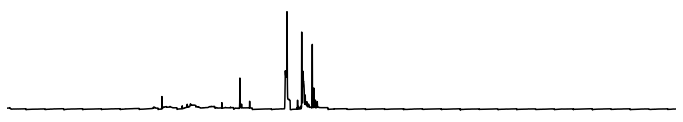

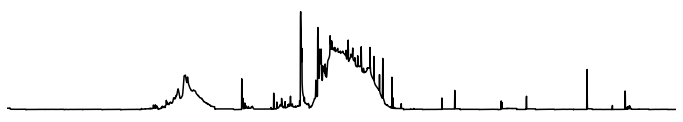

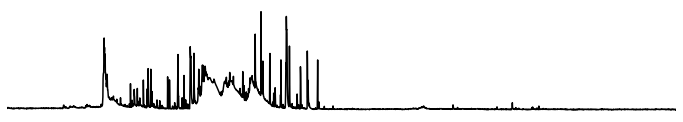

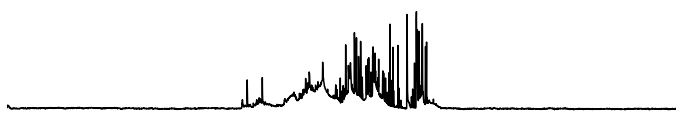

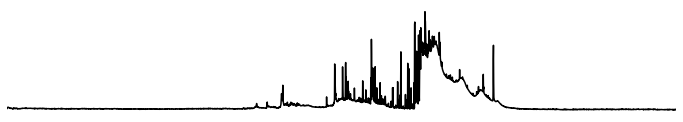

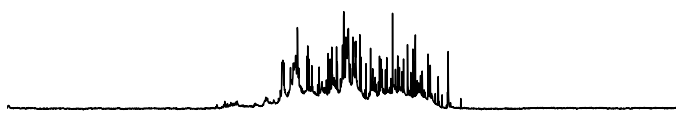

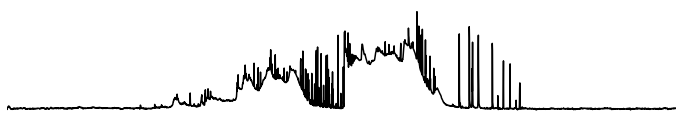

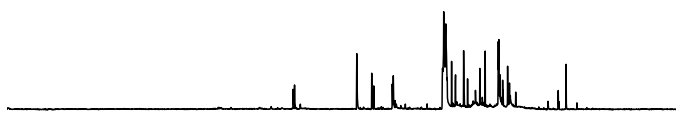

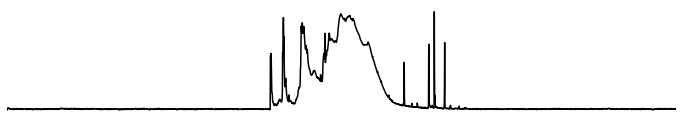

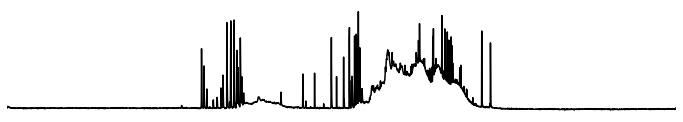

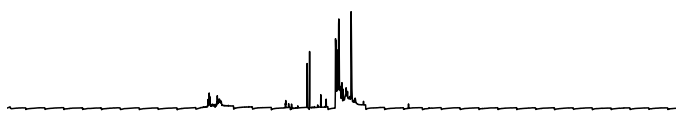

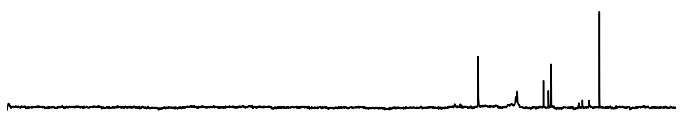

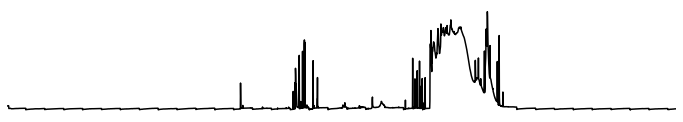

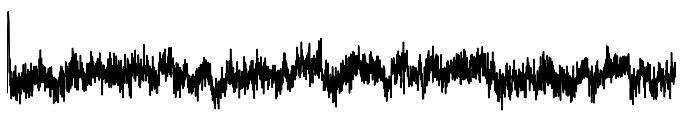

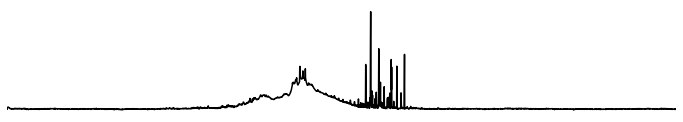

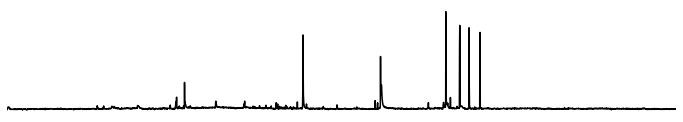

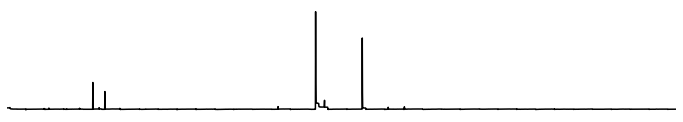

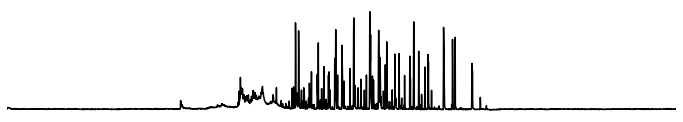

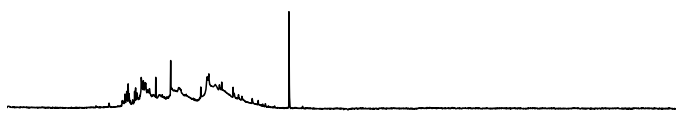

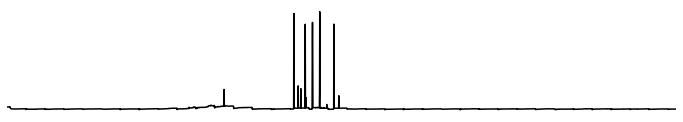

In [130]:
for f in glob.iglob(directory + "/video/*.mp4"): # generator, search immediate subdirectories 
    s = f.split('/')
    st = s[len(s)-1]
    print(f)
    y = pd.read_csv(f + '.csv')    
    
    vcap = cv2.VideoCapture(f)

    if vcap.isOpened(): 
        # get vcap property 
        width  = vcap.get(3)  # float `width`
        height = vcap.get(4)  # float `height`
        
    print(width, ' x ', height)

    #w = 9.29
    w = (width+1)/100
    h = 1.5

    fig = plt.figure(frameon=False)
    fig.set_size_inches(w,h)
    fig.tight_layout()
    #ax = plt.Axes(fig, [0, 0, 1, 1])
    #ax.set_axis_off()
    #fig.add_axes(ax)
    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.axis('off')    
    
    plt.plot(y.index,y['0'], color='black')
    plt.yscale('log')
    plt.xlim([0,len(y)])
    fig.savefig(directory + '/video/output/' + st + '.csv.png', dpi=100, bbox_inches='tight', pad_inches = 0)

None

# Insert Images with lightcurves in to videos

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

#directory = "/storage/experiments/2021/0711_bourka_stiavnica"

# Logarithmic transformation
LIGHTBASE = -50#1.0

def log(c, img):
    output = c * np.log(LIGHTBASE + img)
    output = np.uint8(output + 0.5)
    return output

try:
    os.mkdir(directory + '/video/output')
except:
    pass

for f in glob.iglob(directory + "/video/*.mp4"): # generator, search immediate subdirectories 
    s = f.split('/')
    st = s[len(s)-1]
    print(st)
    
    b = np.zeros(30000)
    
    vcap = cv2.VideoCapture(f)

    if vcap.isOpened(): 
        # get vcap property 
        width  = vcap.get(3)  # float `width`
        height = vcap.get(4)  # float `height`
        
    print(width, ' x ', height)
    vcap.release()

    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    #out = cv2.VideoWriter(directory + '/video/output/' + st , fourcc, 20.0, (928,928+150))
    out = cv2.VideoWriter(directory + '/video/output/' + st , fourcc, 20.0, (round(width),round(height)+150))

    cap = cv2.VideoCapture(f)
    video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(video_length)
    
    img = cv2.imread(directory + '/video/output/' + st + '.csv.png')
    img_not = cv2.bitwise_not(img)
    
    count = 0
    while True:
        ret,frame = cap.read()
        if not(ret):
            break

        frame_log = log(42,frame)
        frame_color = cv2.applyColorMap(frame_log, cv2.COLORMAP_JET)
        
        v_img = cv2.vconcat([img_not, frame_color])
        #pointer = round(count*(928/video_length))
        pointer = round(count*(width/video_length))
        cv2.line(v_img,(pointer,130),(pointer,150),(0,255,0),4)
        count = count + 1
        out.write(v_img)
        
    cap.release()
    out.release()
    print(f)
        
print('end')

1628430961.7903373.mp4
928.0  x  928.0
3221


/nix/store/bd5a7gsg47qnkwywa7r5p7vnyyvpakya-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/nix/store/bd5a7gsg47qnkwywa7r5p7vnyyvpakya-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


/storage/experiments/2021/0807_bourka_sobeslav/video/1628430961.7903373.mp4
1628431603.790285.mp4
928.0  x  928.0
3221
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431603.790285.mp4
1628432202.39826.mp4
928.0  x  928.0
3221
/storage/experiments/2021/0807_bourka_sobeslav/video/1628432202.39826.mp4
1628430105.617505.mp4
928.0  x  928.0
3225
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430105.617505.mp4
1628431939.2651453.mp4
928.0  x  928.0
3223
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431939.2651453.mp4
1628430821.820973.mp4
928.0  x  928.0
3221
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430821.820973.mp4
1628429473.5873687.mp4
928.0  x  928.0
3224
/storage/experiments/2021/0807_bourka_sobeslav/video/1628429473.5873687.mp4
1628430372.7465947.mp4
928.0  x  928.0
3224
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430372.7465947.mp4
1628431195.5110645.mp4
928.0  x  928.0
3221
/storage/experiments/2021/0807_bourka_sobeslav/vid

# Plot lightcurves into one image

/storage/experiments/2021/0808_bourka_zdiby/video/2021-08-08-19-08-40.970320-lightning.mp4.csv
/storage/experiments/2021/0808_bourka_zdiby/video/2021-08-08-19-09-48.841344-lightning.mp4.csv
/storage/experiments/2021/0808_bourka_zdiby/video/2021-08-08-19-13-55.056570-lightning.mp4.csv
/storage/experiments/2021/0808_bourka_zdiby/video/2021-08-08-19-18-54.934162-lightning.mp4.csv
/storage/experiments/2021/0808_bourka_zdiby/video/2021-08-08-19-06-57.587443-lightning.mp4.csv
/storage/experiments/2021/0808_bourka_zdiby/video/2021-08-08-18-56-50.756577-lightning.mp4.csv
/storage/experiments/2021/0808_bourka_zdiby/video/2021-08-08-19-16-18.846720-lightning.mp4.csv
/storage/experiments/2021/0808_bourka_zdiby/video/2021-08-08-18-53-29.829741-lightning.mp4.csv


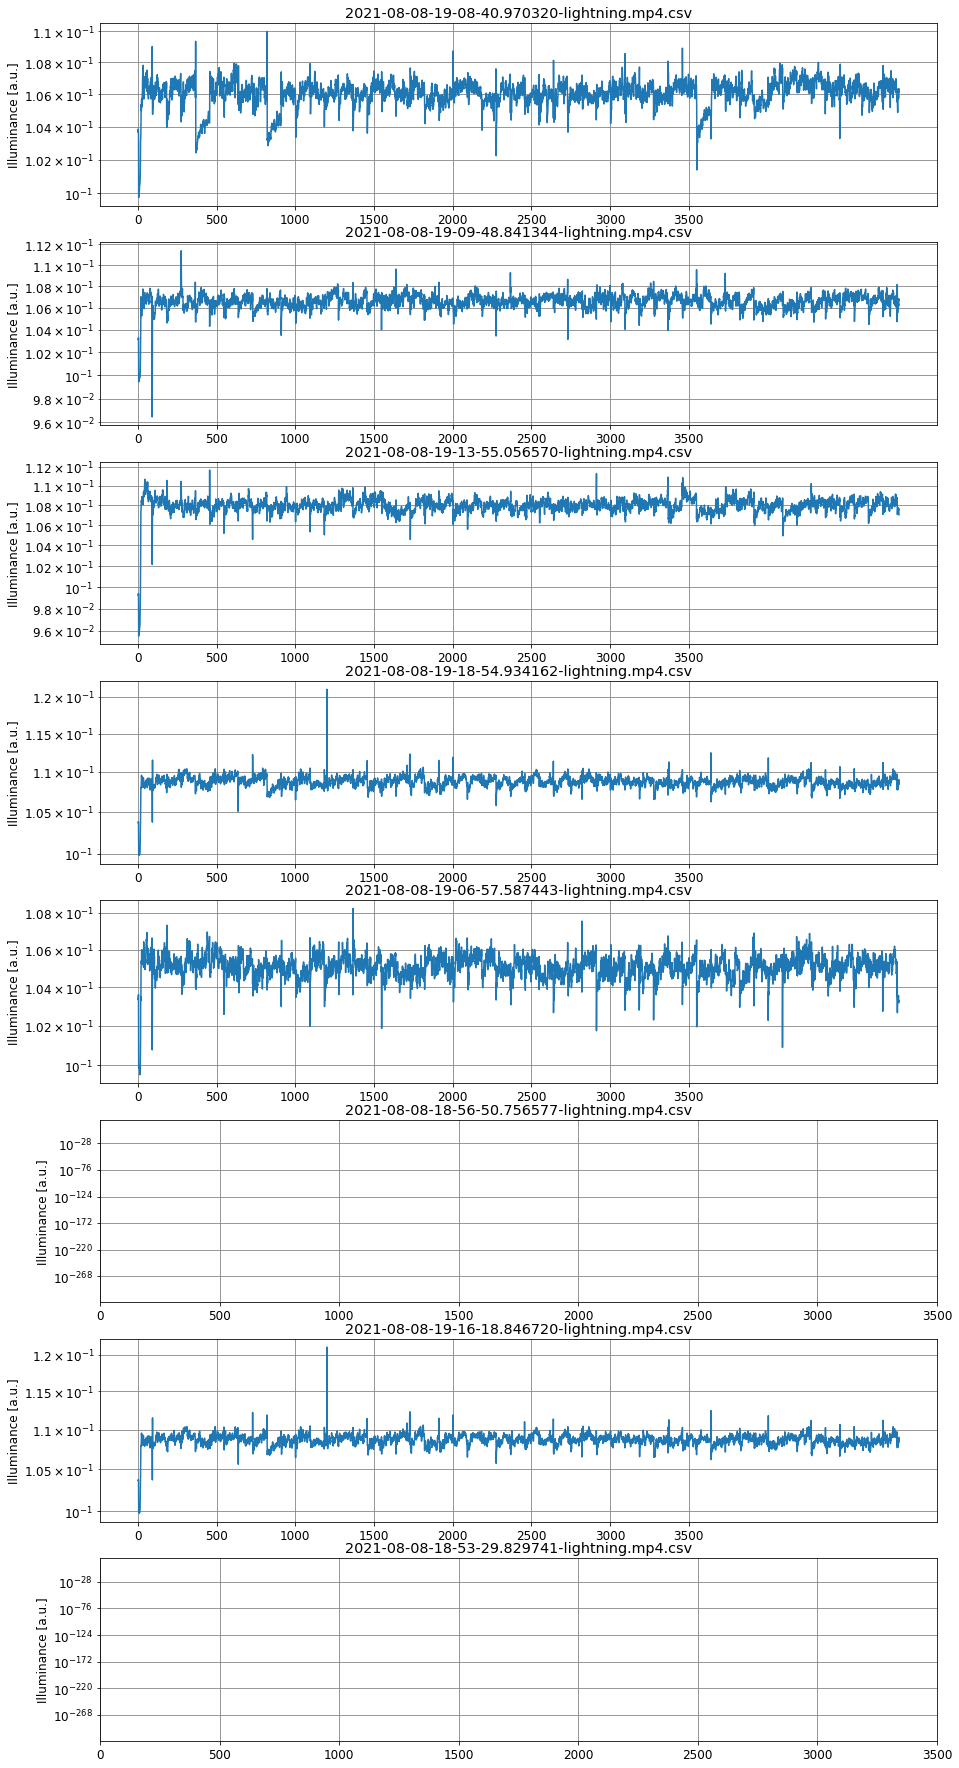

In [104]:
from matplotlib.gridspec import GridSpec

gs=GridSpec(20,1)
fig = plt.figure(figsize=(15,80))
plt.rc('font', size=12)    

i = 0
for f in glob.iglob(directory + "/video/*.mp4.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        print(f)
        y = pd.read_csv(f)

        plt.subplot(gs[i,0])
        plt.plot(y['0'])
        plt.yscale('log')
        plt.title(st)
        #plt.xlabel('Frame [-]')
        plt.ylabel('Illuminance [a.u.]')
        plt.grid(b=True, which='major', color='grey', linestyle='-')
        plt.grid(b=True, which='minor', color='grey', linestyle='-')
        plt.xticks(np.arange(0, 4000, 500))
        i += 1
    except:
        pass

    
fig.savefig(directory + '/video/output/list.png')


# Plot Light Curves in correct Time

/storage/experiments/2021/0815_bourka_veseli_auto1/video/1629121549.6116743.mp4.csv
/storage/experiments/2021/0815_bourka_veseli_auto1/video/1629124457.9017773.mp4.csv
/storage/experiments/2021/0815_bourka_veseli_auto1/video/1629122966.0174115.mp4.csv
/storage/experiments/2021/0815_bourka_veseli_auto1/video/1629122363.3099189.mp4.csv
/storage/experiments/2021/0815_bourka_veseli_auto1/video/1629122474.0501997.mp4.csv
/storage/experiments/2021/0815_bourka_veseli_auto1/video/1629122229.1727424.mp4.csv
/storage/experiments/2021/0815_bourka_veseli_auto1/video/1629122594.6133194.mp4.csv
/storage/experiments/2021/0815_bourka_veseli_auto1/video/1629121307.2893627.mp4.csv
/storage/experiments/2021/0815_bourka_veseli_auto1/video/1629124285.5114205.mp4.csv
/storage/experiments/2021/0815_bourka_veseli_auto1/video/1629123202.865237.mp4.csv
/storage/experiments/2021/0815_bourka_veseli_auto1/video/1629124617.678443.mp4.csv
/storage/experiments/2021/0815_bourka_veseli_auto1/video/1629121971.4187524.mp

/nix/store/bd5a7gsg47qnkwywa7r5p7vnyyvpakya-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
/nix/store/bd5a7gsg47qnkwywa7r5p7vnyyvpakya-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


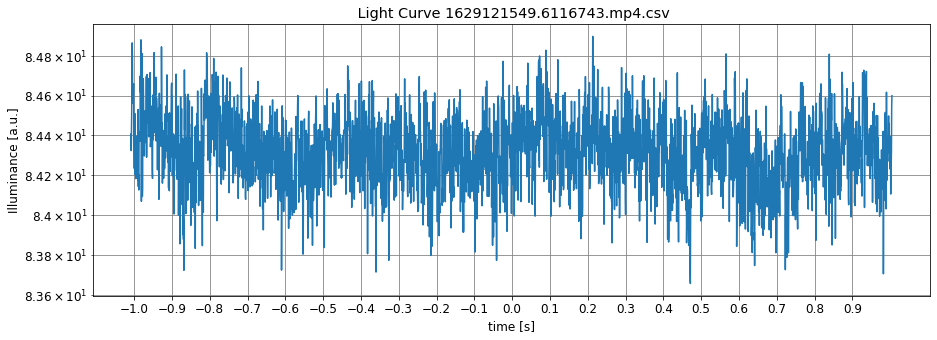

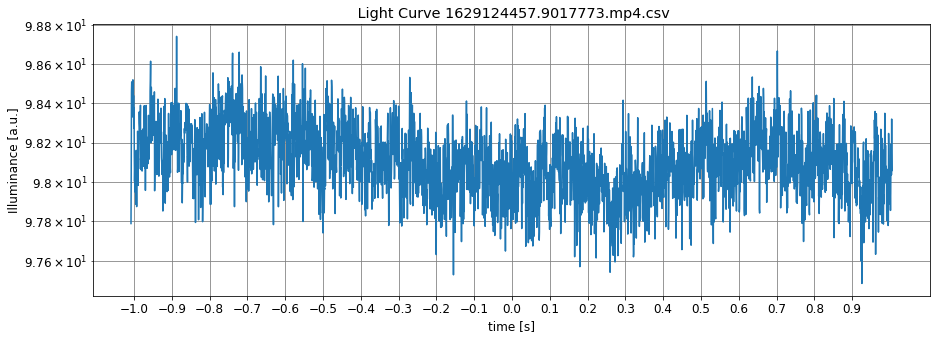

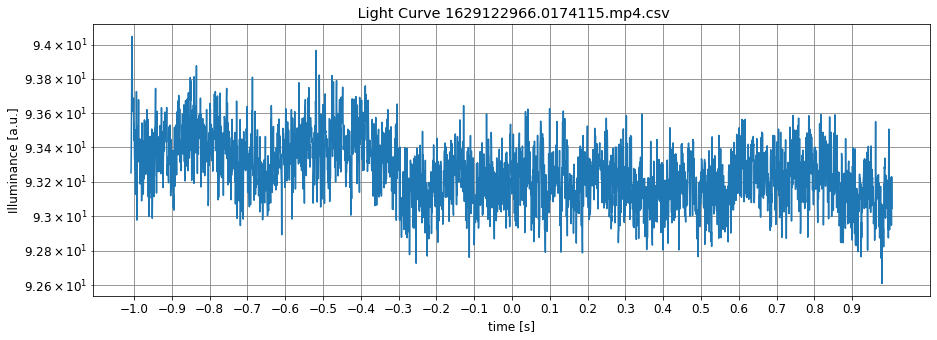

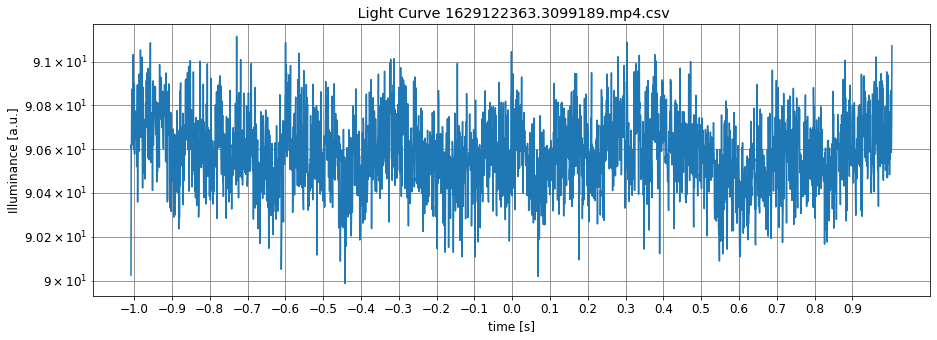

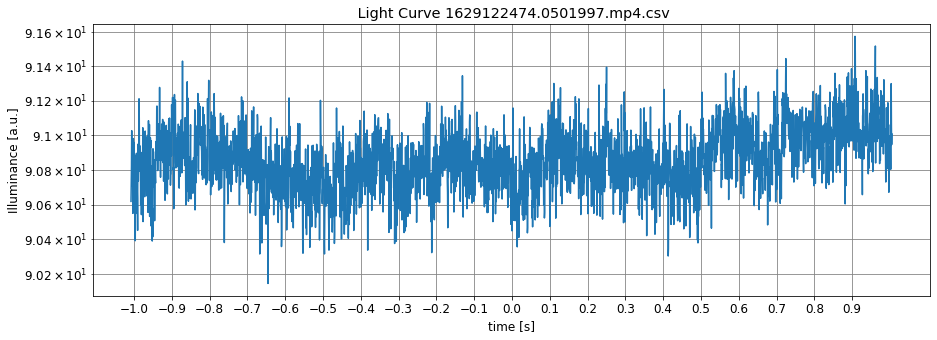

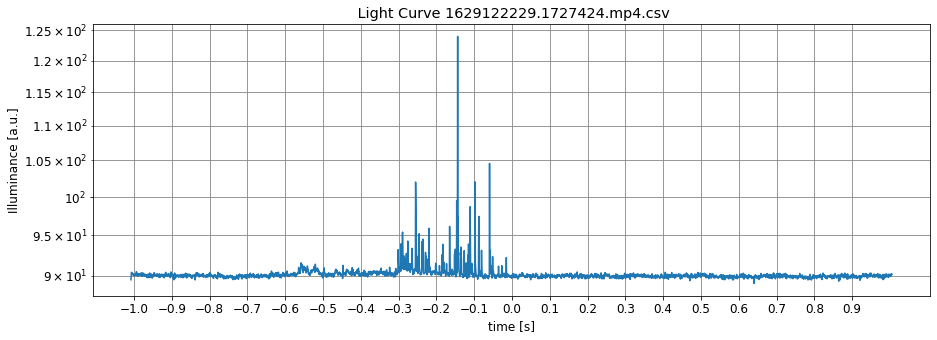

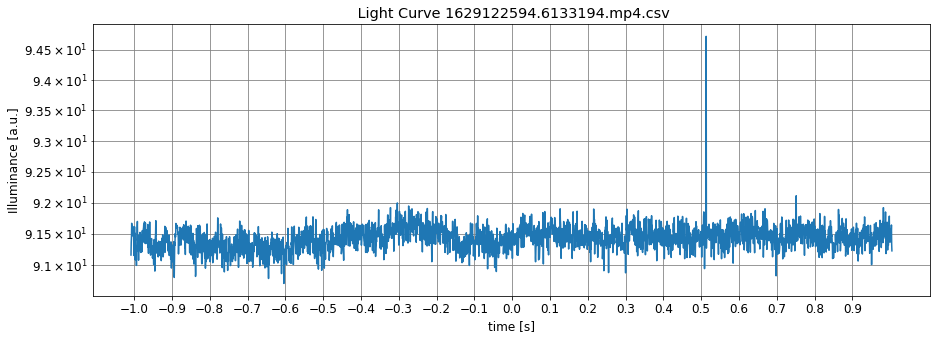

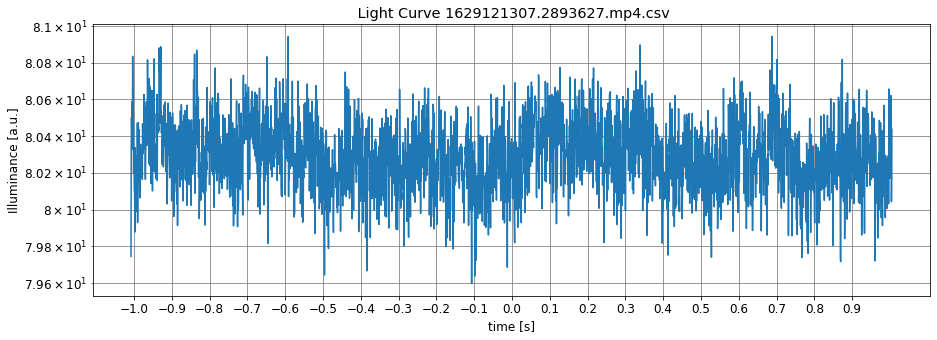

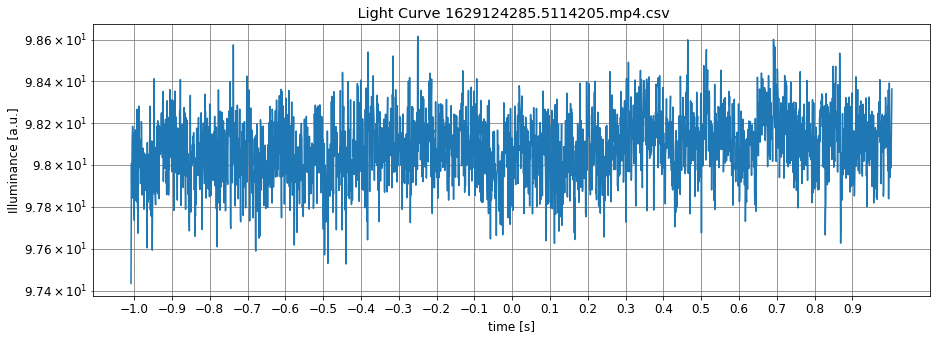

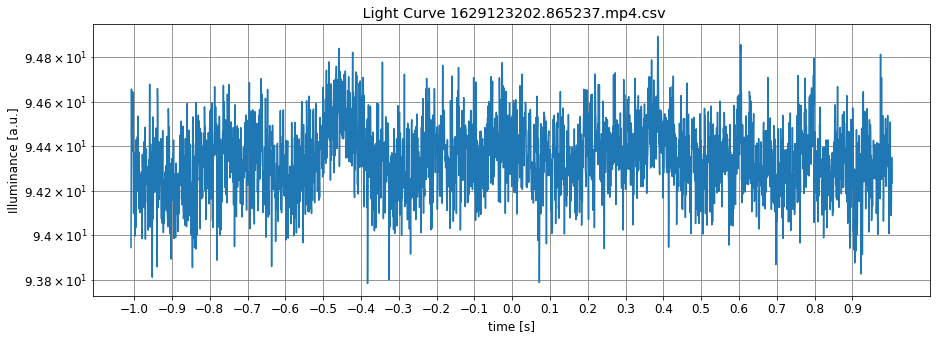

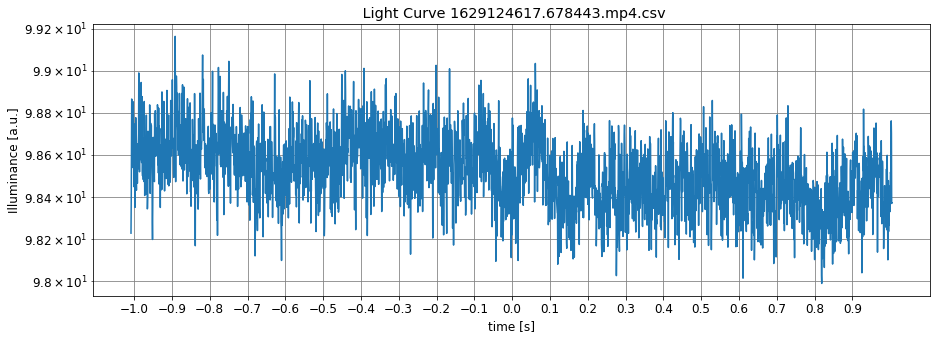

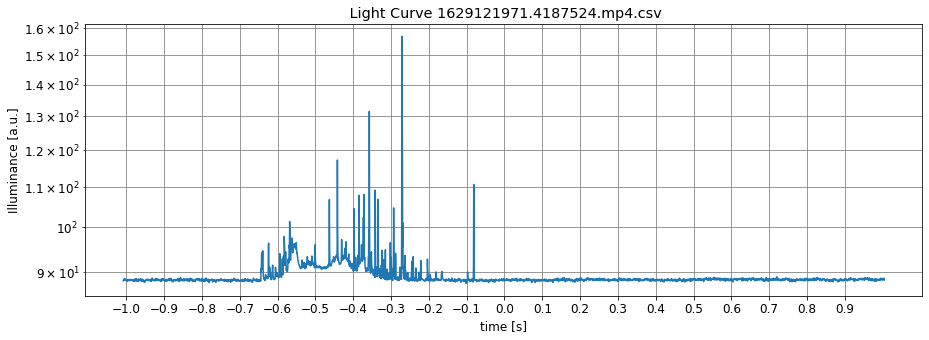

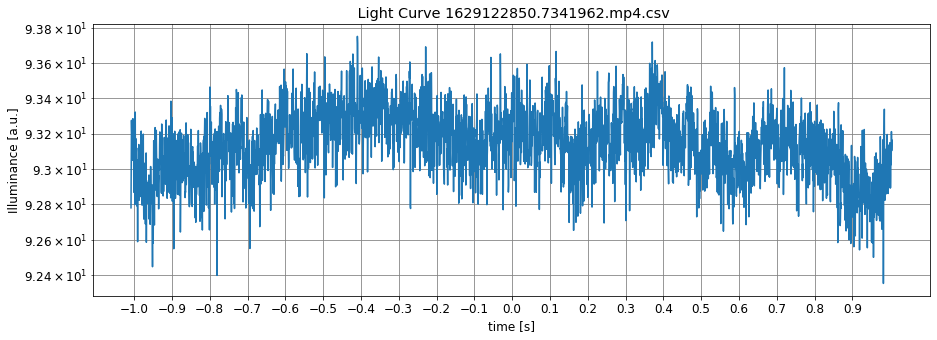

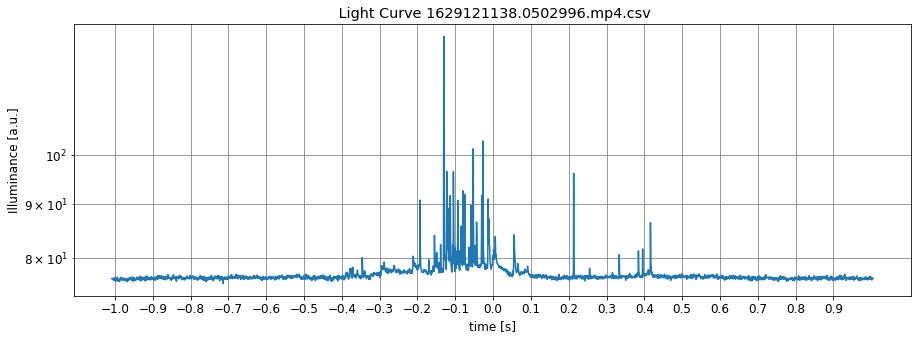

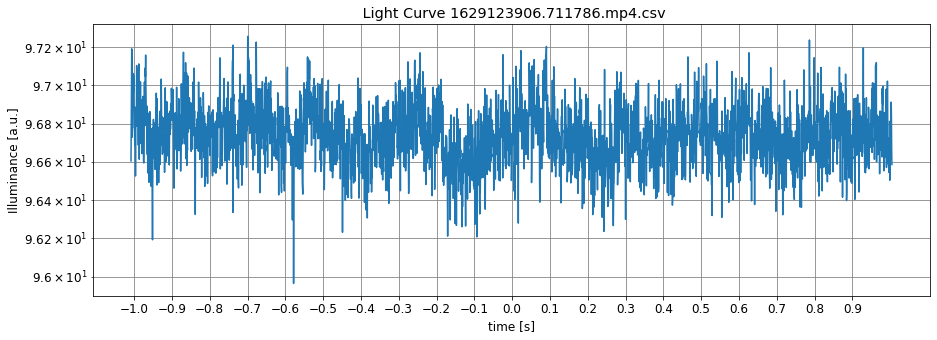

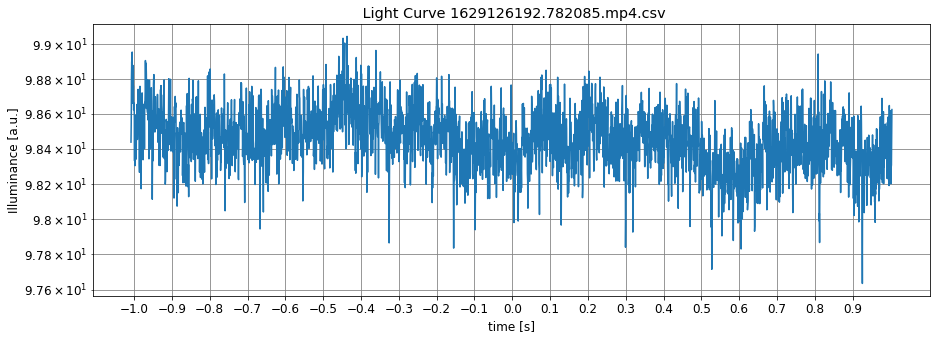

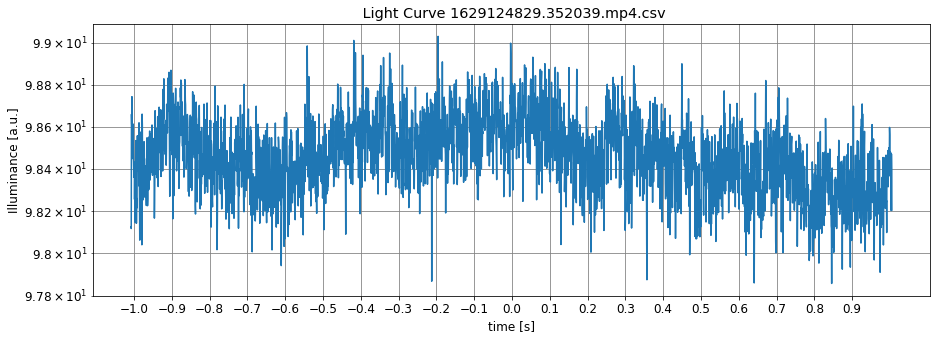

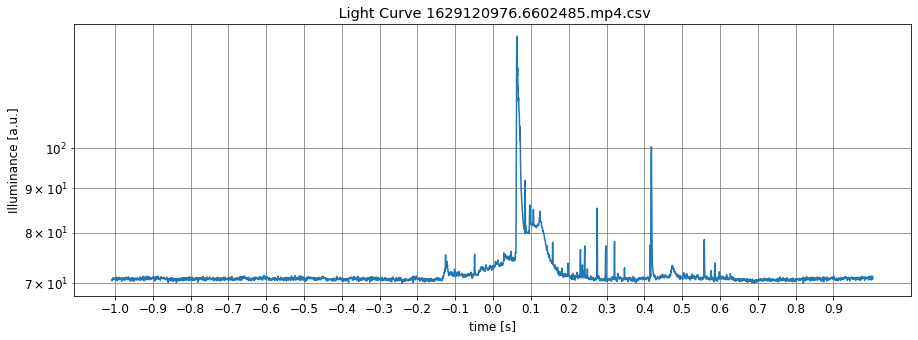

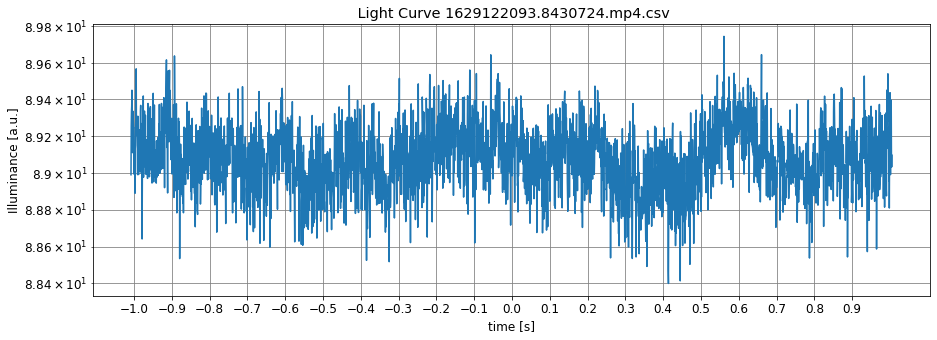

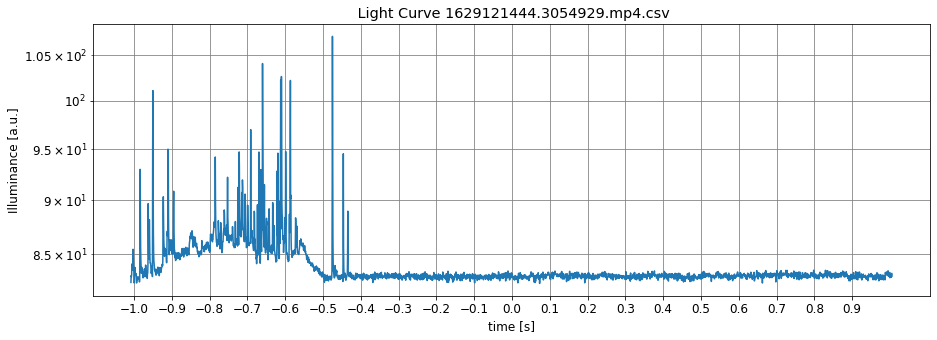

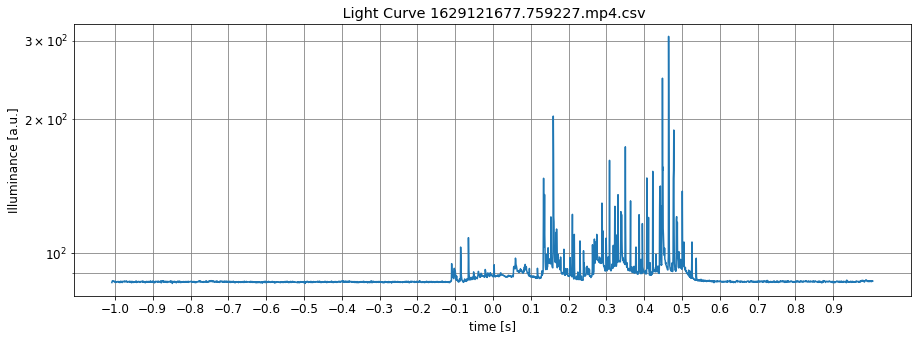

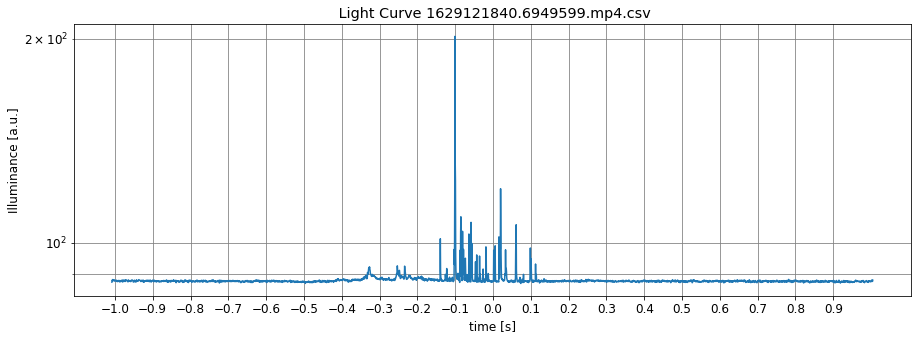

In [41]:
for f in glob.iglob(directory + "/video/*.mp4.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        print(f)
        y = pd.read_csv(f)
        y['time'] = (y.index - 1613)*(1/1600)

        plt.figure(figsize=(15,5))
        plt.rc('font', size=12)    

        plt.plot(y['time'],y['0'])
        plt.yscale('log')
        plt.title(' Light Curve ' + st)
        plt.xlabel('time [s]')
        plt.ylabel('Illuminance [a.u.]')
        plt.grid(b=True, which='major', color='grey', linestyle='-')
        plt.grid(b=True, which='minor', color='grey', linestyle='-')
        plt.xticks(np.arange(-1, 1, 0.1))

    except:
        pass


In [49]:
y['time'] = (y.index - 1500)*(1/1600)
y

Unnamed: 0           0      time
0              0  152.235385 -0.937500
1              1  152.223724 -0.936875
2              2  152.284527 -0.936250
3              3  152.317903 -0.935625
4              4  152.296943 -0.935000
...          ...         ...       ...
3216        3216  152.172327  1.072500
3217        3217  152.209643  1.073125
3218        3218  152.192329  1.073750
3219        3219  152.221078  1.074375
3220        3220  152.175992  1.075000

[3221 rows x 3 columns]

# TO DO:

# Plot Light Curves in correct Time

In [44]:
for f in glob.iglob("./data/*.mp4.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        ss = st.split('.')
        sst = ss[0] + '.' + ss[1]

        y = pd.read_csv(f)

        df = pd.read_table('./data/' + sst + '_first_frame', sep=',', header=None, engine='python' )
        plt.figure(figsize=(15,5))

        plt.plot(np.linspace(df[1],df[3],df[2]-df[0]),y.iloc[:int(df[2]-df[0]),1])
        plt.yscale('log')
        plt.title(' Light Curve ' + st)
        plt.xlabel('Time [s]')
        plt.ylabel('Illuminance [a.u.]')
    except:
        pass


# Plot Light Curve together with Antenna data

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: object of type <class 'pandas.core.series.Series'> cannot be safely interpreted as an integer.


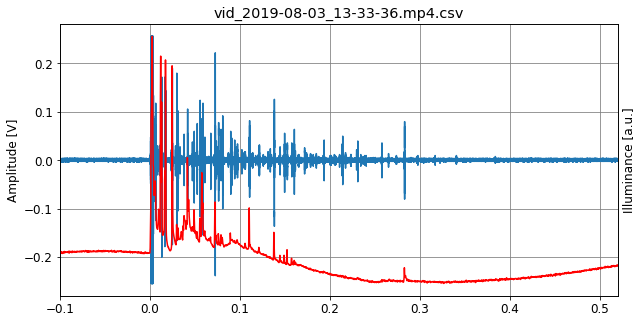

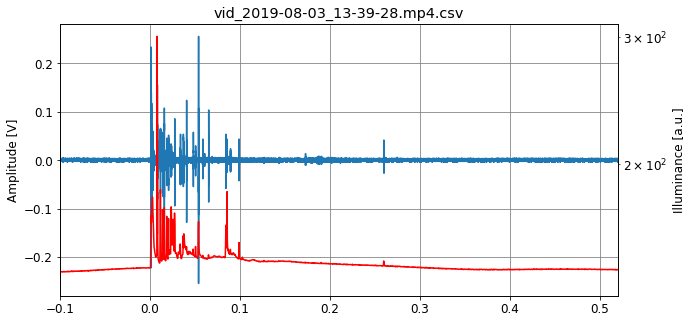

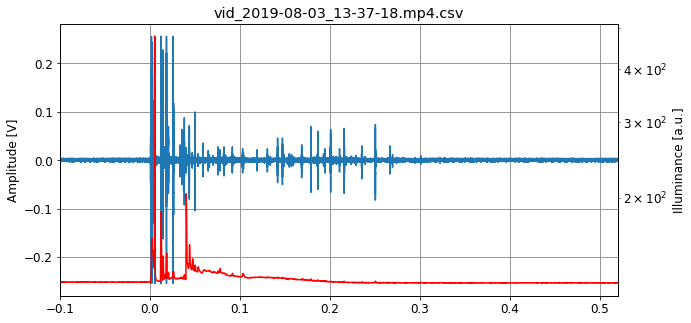

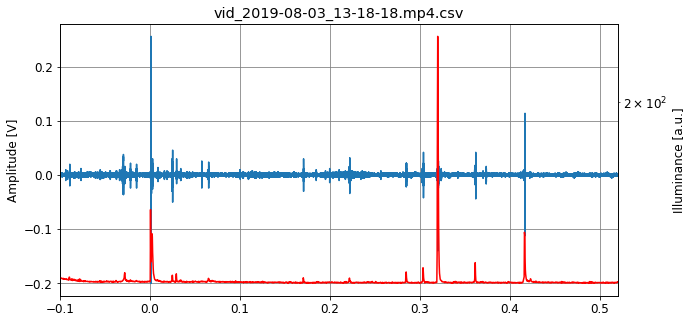

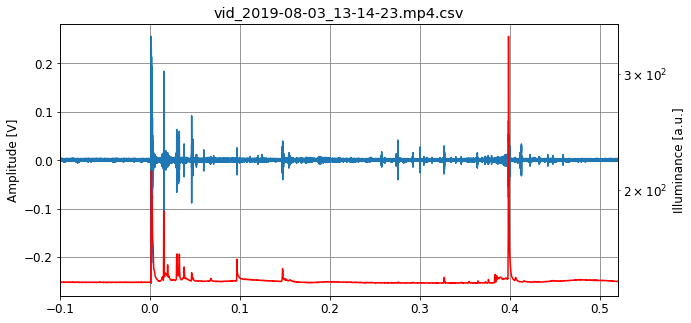

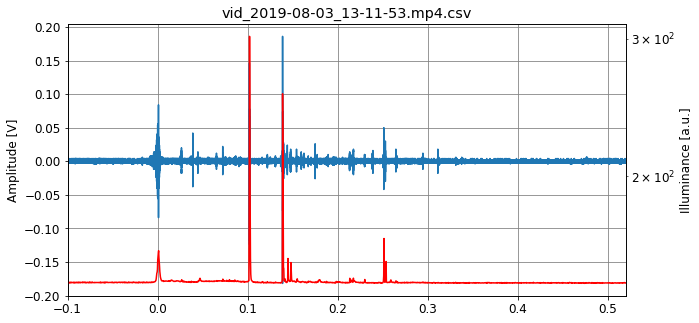

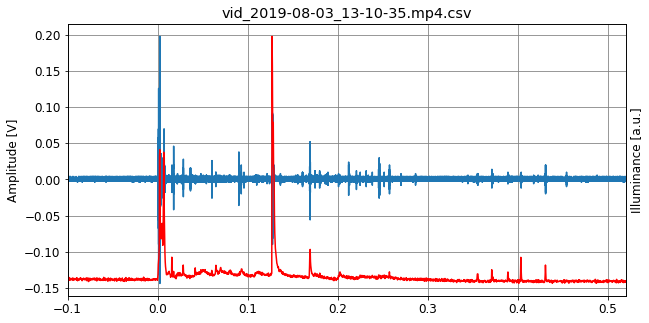

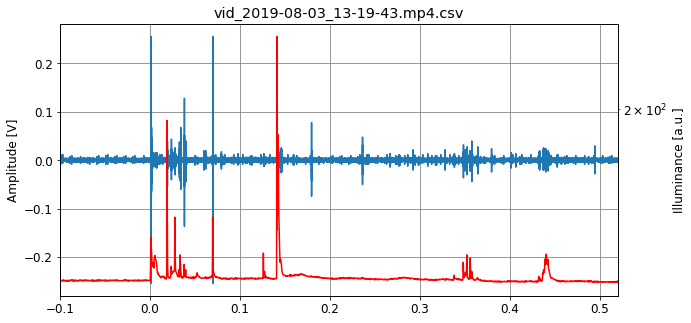

In [155]:
%matplotlib inline

for f in glob.iglob("./data/*.*.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        ss = st.split('.')
        sst = ss[0] + '.' + ss[1]

        y = pd.read_csv(f)

        df = pd.read_table('./data/' + sst + '_first_frame', sep=',', header=None, engine='python' )


        
        param = pd.read_table('./antenna/' + df.iloc[0,4], sep=',', nrows=1, header=0, comment='*',engine='python' )

        timeinc = param['Increment']
        timeoffset = param['Start']

        dfa = pd.read_table('./antenna/' + df.iloc[0,4], sep=',', skiprows=2, header=None, comment='*',engine='python' )

        dfa[0] = pd.to_numeric(dfa[0])

        dfa[0]*=float(param['Increment'])
        dfa[0]+=float(param['Start'])


        plt.figure(figsize=(10,5))
        plt.rc('font', size=12)    

        plt.plot(dfa[0],dfa[1])

        plt.grid(b=True, which='major', color='grey', linestyle='-')
        plt.ylabel('Amplitude [V]')
        plt.xlim(-0.1,0.52)

        plt.twinx()
        
        plt.plot(np.linspace(df[1],df[3],df[2]-df[0]),y.iloc[:int(df[2]-df[0]),1], c='r')
        plt.yscale('log')
        plt.title(st)
        plt.xlabel('Time [s]')
        plt.ylabel('Illuminance [a.u.]')
    except:
        pass

    



ModuleNotFoundError: No module named 'pygame'

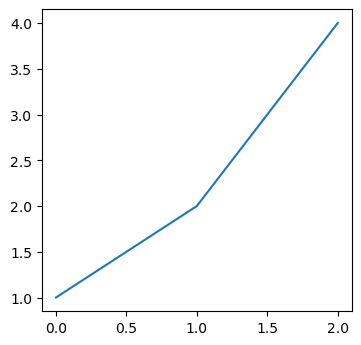

In [10]:
import matplotlib
matplotlib.use("Agg")

import matplotlib.backends.backend_agg as agg


import pylab

fig = pylab.figure(figsize=[4, 4], # Inches
                   dpi=100,        # 100 dots per inch, so the resulting buffer is 400x400 pixels
                   )
ax = fig.gca()
ax.plot([1, 2, 4])

canvas = agg.FigureCanvasAgg(fig)
canvas.draw()
renderer = canvas.get_renderer()
raw_data = renderer.tostring_rgb()

import pygame
from pygame.locals import *

pygame.init()

window = pygame.display.set_mode((600, 400), DOUBLEBUF)
screen = pygame.display.get_surface()

size = canvas.get_width_height()

surf = pygame.image.fromstring(raw_data, size, "RGB")
screen.blit(surf, (0,0))
pygame.display.flip()

crashed = False
while not crashed:
	for event in pygame.event.get():
		if event.type == pygame.QUIT:
			crashed = True

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

directory = "/storage/experiments/2021/0609_bourka_sobeslav/"

f = directory + 'video/' + 'vid_2021-06-09_10-38-03.mp4'

s = f.split('/')
st = s[len(s)-1]

b = np.zeros(30000)

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter(directory + 'output.mp4', fourcc, 20.0, (800,600))

cap = cv2.VideoCapture(f)

count = 0
while True:
    ret,frame = cap.read()
    crop_img = frame[0:565, 0:800] #frame[0:768, 0:1024]
    b[count] = crop_img.ravel().sum() / (800 * 565)

    if (count > 1900):
        for i in range(1900,count):
            cv2.line(frame,(i-1900,int(round(b[i-1]))),(i-1900,int(round(b[i]))),(255,0,255),2)
        #print(int(b[i]))
        out.write(frame)

    if (b[count] == 0):
        break
    count = count + 1
    if (count==2000):
        break

cap.release()
out.release()
print(f)
    
print(count)
print('end')

/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-38-03.mp4
2000
end


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

directory = "/storage/experiments/2021/0609_bourka_sobeslav/"

f = directory + 'video/' + 'vid_2021-06-09_10-38-03.mp4'

s = f.split('/')
st = s[len(s)-1]

b = np.zeros(30000)

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter(directory + 'output.mp4', fourcc, 20.0, (800,600))

cap = cv2.VideoCapture(f)

count = 0
while True:
    ret,frame = cap.read()
    crop_img = frame[0:565, 0:800] #frame[0:768, 0:1024]
    b[count] = crop_img.ravel().sum() / (800 * 565)

    if (count>1500):
        for i in range(1500,count):
            cv2.line(frame,(int(round((i-1500)/((5000-1500)/800))),int(round(b[i-1]))),(int(round((i-1500)/((5000-1500)/800))),int(round(b[i]))),(255,0,255),2)
        #print(int(b[i]))
        out.write(frame)

    if (b[count] == 0):
        break
    count = count + 1
    if (count==5000):
        break

cap.release()
out.release()
print(f)
    
print(count)
print('end')

/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-38-03.mp4
5000
end


# SLAVIA

end


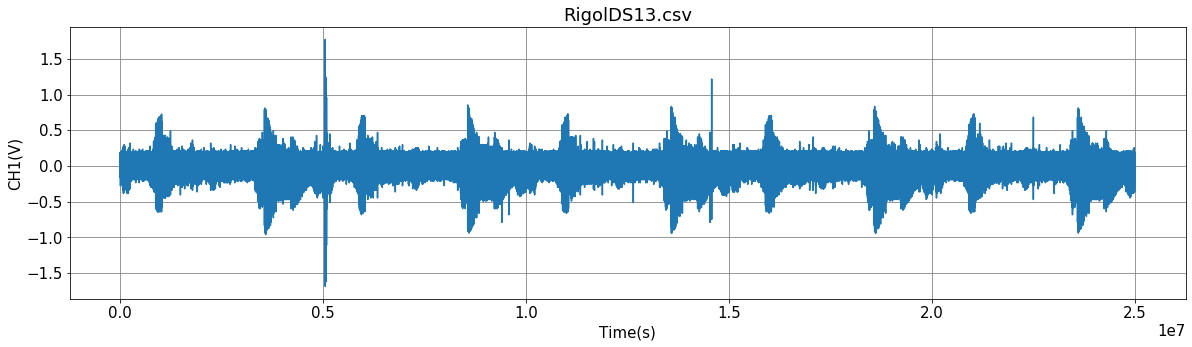

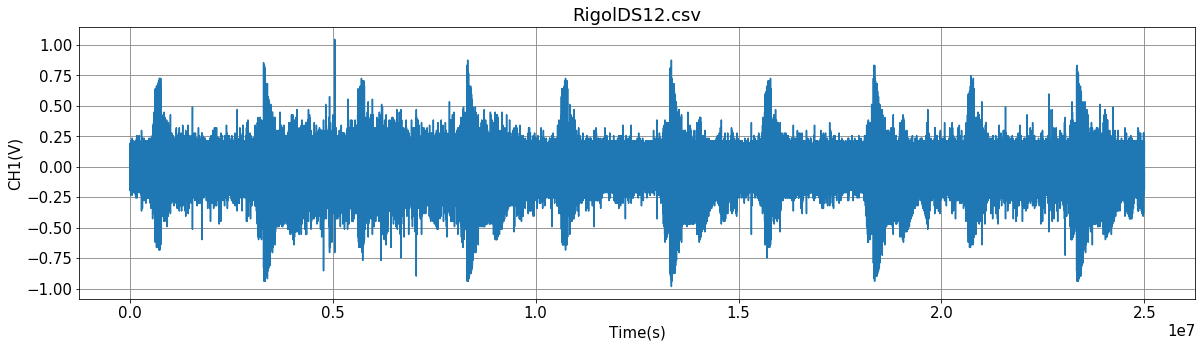

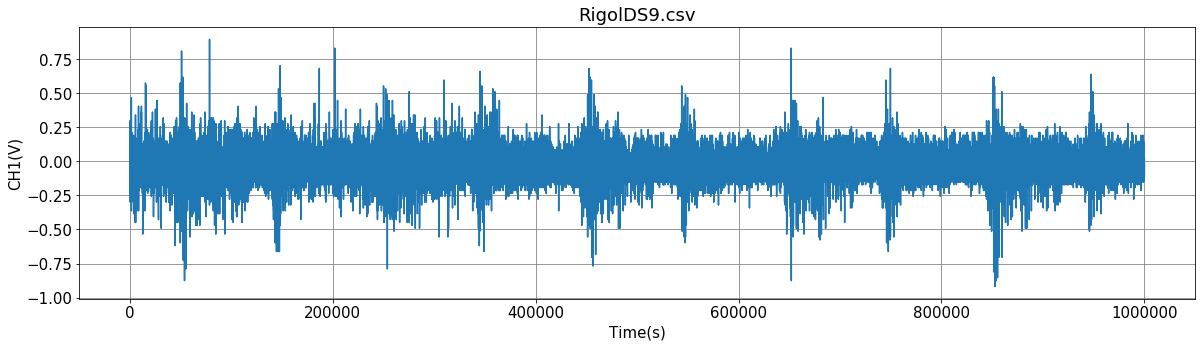

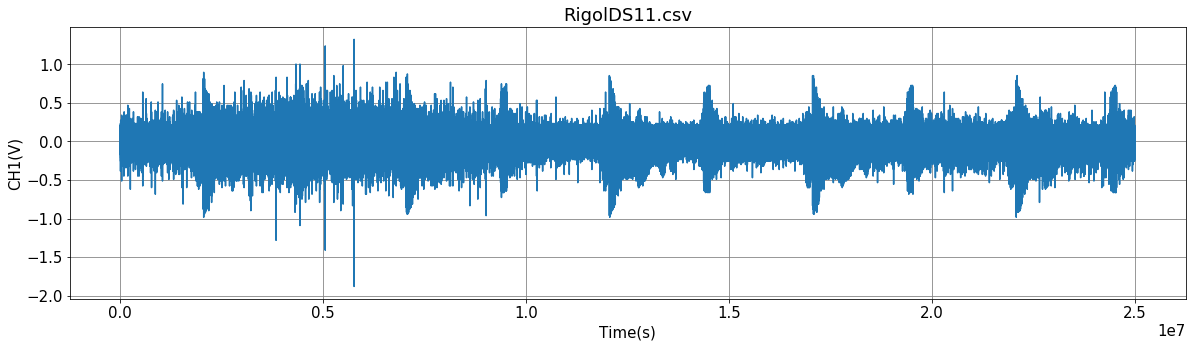

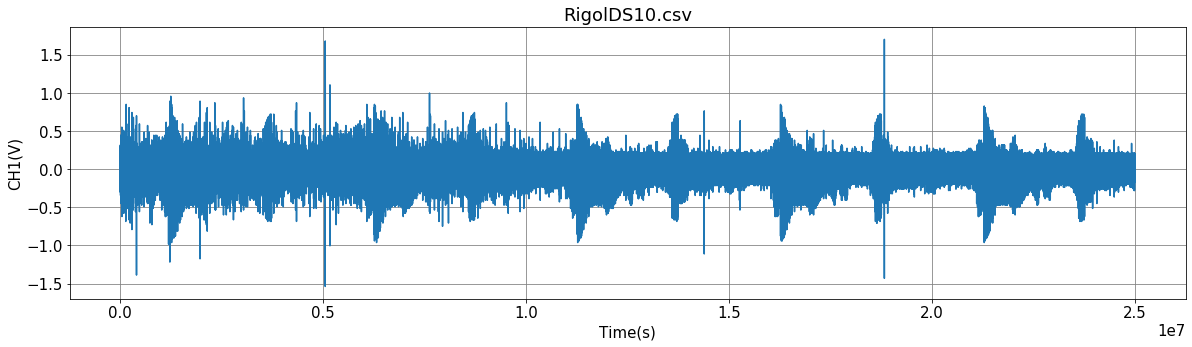

In [12]:
import glob
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

directory = "/storage/experiments/2021/0629_bourka_radosovice"

for f in glob.iglob(directory + "/slavia/*.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        #print(st)
        
        df = pd.read_csv(f, sep=',', header=0)
        #print(df)
        plt.figure(figsize=(20,5))
        plt.tight_layout()
        matplotlib.rcParams.update({'font.size': 15})
        plt.plot(df.index,df['CH1(V)'])
        plt.title(st)
        plt.xlabel('Time(s)')
        plt.ylabel('CH1(V)')
        plt.grid(b=True, which='major', color='grey', linestyle='-')
    except:
        pass
        
print('end')

In [9]:
df

CH1(V)  t0 = -0.0202s   tInc = 4e-09s  Unnamed: 3
0        -0.042726            NaN             NaN         NaN
1        -0.021363            NaN             NaN         NaN
2        -0.021363            NaN             NaN         NaN
3        -0.021363            NaN             NaN         NaN
4        -0.042726            NaN             NaN         NaN
...            ...            ...             ...         ...
24999995 -0.021363            NaN             NaN         NaN
24999996 -0.042726            NaN             NaN         NaN
24999997 -0.042726            NaN             NaN         NaN
24999998 -0.042726            NaN             NaN         NaN
24999999 -0.042726            NaN             NaN         NaN

[25000000 rows x 4 columns]

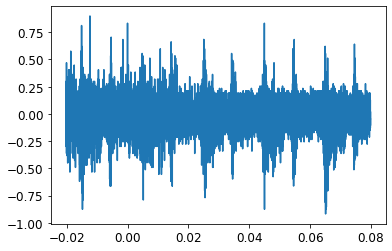

In [7]:
plt.plot(df['Time(s)'],df['CH1(V)'])

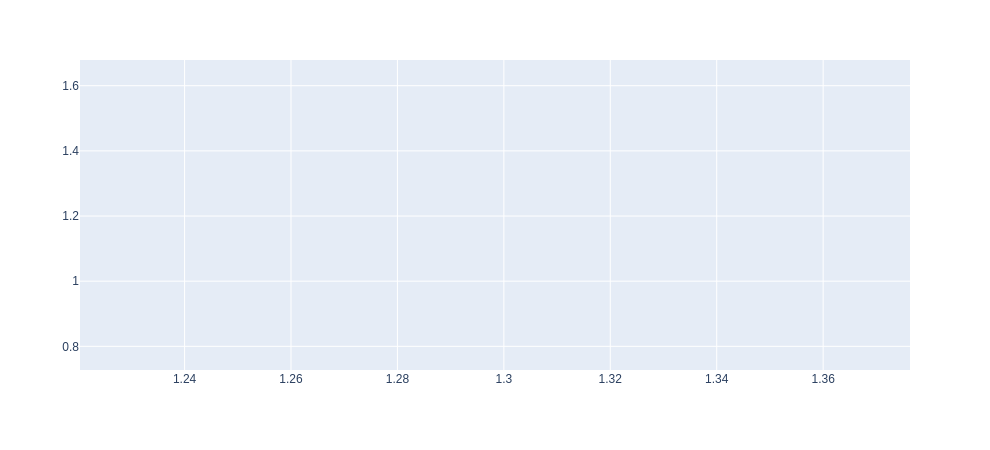

In [8]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = px.line(df)
fig.show()

In [ ]:
data = [go.Scatter(x=df['Time(s)'],y=df['CH1(V)'])]
#layout = go.Layout(title='Flux', yaxis=dict(title='Voltage [V]', type='log'), xaxis=dict(title='Time [s]'))
layout = go.Layout(title='SLAVIA', yaxis=dict(title='Voltage [V]'), xaxis=dict(title='Time [s]'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [140]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

# Logarithmic transformation
def log(c, img):
    output = c * np.log(1.0 + img)
    output = np.uint8(output + 0.5)
    return output

d = ["/storage/experiments/2021/0605_bourka_radosovice",\
"/storage/experiments/2021/0609_bourka_sobeslav",\
"/storage/experiments/2021/0711_bourka_stiavnica",\
"/storage/experiments/2021/0713_bourka_exit29_D8",\
"/storage/experiments/2021/0714_bourka_martin",\
"/storage/experiments/2021/0714_bourka_sobeslav",\
"/storage/experiments/2021/0725_bourka_ratmirov",\
"/storage/experiments/2021/0726_bourka_zabori",\
"/storage/experiments/2021/0803_bourka_votice",\
"/storage/experiments/2021/0807_bourka_sobeslav",\
"/storage/experiments/2021/0815_bourka_veseli_auto1",\
"/storage/experiments/2021/0815_bourka_veseli_auto0",\
"/storage/experiments/2021/0816_bourka_sobeslav",\
"/storage/experiments/2021/0822_bourka_sobeslav_auto0"]

for directory in d:
    print(directory)

    try:
        os.mkdir(directory + '/video/output')
    except:
        pass

    for f in glob.iglob(directory + "/video/*.mp4"): # generator, search immediate subdirectories 
        s = f.split('/')
        st = s[len(s)-1]
        print(st)

        b = np.zeros(30000)

        vcap = cv2.VideoCapture(f)

        if vcap.isOpened(): 
            # get vcap property 
            width  = vcap.get(3)  # float `width`
            height = vcap.get(4)  # float `height`

        print(width, ' x ', height)
        vcap.release()

        fourcc = cv2.VideoWriter_fourcc(*'MP4V')
        #out = cv2.VideoWriter(directory + '/video/output/' + st , fourcc, 20.0, (928,928+150))
        out = cv2.VideoWriter(directory + '/video/output/' + st , fourcc, 20.0, (round(width),round(height)+150))

        cap = cv2.VideoCapture(f)
        video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        print(video_length)

        img = cv2.imread(directory + '/video/output/' + st + '.csv.png')
        img_not = cv2.bitwise_not(img)

        count = 0
        while True:
            ret,frame = cap.read()
            if not(ret):
                break

            frame_log = log(42,frame)
            frame_color = cv2.applyColorMap(frame_log, cv2.COLORMAP_JET)

            v_img = cv2.vconcat([img_not, frame_color])
            #pointer = round(count*(928/video_length))
            pointer = round(count*(width/video_length))
            cv2.line(v_img,(pointer,130),(pointer,150),(0,255,0),4)
            count = count + 1
            out.write(v_img)

        cap.release()
        out.release()
        print(f)
        
print('end')

/storage/experiments/2021/0605_bourka_radosovice
vid_2021-06-05_16-52-53.mp4
1024.0  x  768.0
14550
/storage/experiments/2021/0605_bourka_radosovice/video/vid_2021-06-05_16-52-53.mp4
vid_2021-06-05_16-38-38.mp4
1024.0  x  768.0
14550
/storage/experiments/2021/0605_bourka_radosovice/video/vid_2021-06-05_16-38-38.mp4
vid_2021-06-05_17-05-16.mp4
1024.0  x  768.0
14549
/storage/experiments/2021/0605_bourka_radosovice/video/vid_2021-06-05_17-05-16.mp4
/storage/experiments/2021/0609_bourka_sobeslav
vid_2021-06-09_10-55-02.mp4
800.0  x  600.0
8612
/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-55-02.mp4
vid_2021-06-09_10-44-22.mp4
800.0  x  600.0
8611
/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-44-22.mp4
vid_2021-06-09_10-38-03.mp4
800.0  x  600.0
8612
/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-38-03.mp4
vid_2021-06-09_10-48-35.mp4
800.0  x  600.0
8610
/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-0

In [155]:
d = ["/storage/experiments/2021/0605_bourka_radosovice",\
"/storage/experiments/2021/0609_bourka_sobeslav",\
"/storage/experiments/2021/0711_bourka_stiavnica",\
"/storage/experiments/2021/0713_bourka_exit29_D8",\
"/storage/experiments/2021/0714_bourka_martin",\
"/storage/experiments/2021/0714_bourka_sobeslav",\
"/storage/experiments/2021/0725_bourka_ratmirov",\
"/storage/experiments/2021/0726_bourka_zabori",\
"/storage/experiments/2021/0803_bourka_votice",\
"/storage/experiments/2021/0807_bourka_sobeslav",\
"/storage/experiments/2021/0815_bourka_veseli_auto1",\
"/storage/experiments/2021/0815_bourka_veseli_auto0",\
"/storage/experiments/2021/0816_bourka_sobeslav",\
"/storage/experiments/2021/0822_bourka_sobeslav_auto0"]

files = pd.DataFrame( columns=['name', 'width', 'height', 'frames'])

for directory in d:
    print(directory)
    files = files.append({'name':directory}, ignore_index=True)

    try:
        os.mkdir(directory + '/video/output')
    except:
        pass

    for f in glob.iglob(directory + "/video/output/*.mp4"): # generator, search immediate subdirectories 
        s = f.split('/')
        st = s[len(s)-1]
        #print(st)

        vcap = cv2.VideoCapture(f)
        width  = vcap.get(3)  # float `width`
        height = vcap.get(4)  # float `height`
        video_length = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))

        #print(f, ',', int(width), ',', int(height), ',', video_length)
        files = files.append({'name':f, 'width':int(width), 'height':int(height), 'frames':video_length}, ignore_index=True)
        vcap.release()
files.to_csv("/storage/experiments/2021/test/listoffiles.csv")

/storage/experiments/2021/0605_bourka_radosovice
/storage/experiments/2021/0609_bourka_sobeslav
/storage/experiments/2021/0711_bourka_stiavnica
/storage/experiments/2021/0713_bourka_exit29_D8
/storage/experiments/2021/0714_bourka_martin
/storage/experiments/2021/0714_bourka_sobeslav
/storage/experiments/2021/0725_bourka_ratmirov
/storage/experiments/2021/0726_bourka_zabori
/storage/experiments/2021/0803_bourka_votice
/storage/experiments/2021/0807_bourka_sobeslav
/storage/experiments/2021/0815_bourka_veseli_auto1
/storage/experiments/2021/0815_bourka_veseli_auto0
/storage/experiments/2021/0816_bourka_sobeslav
/storage/experiments/2021/0822_bourka_sobeslav_auto0


In [157]:
d = ["/storage/experiments/2021/0605_bourka_radosovice",\
"/storage/experiments/2021/0609_bourka_sobeslav",\
"/storage/experiments/2021/0711_bourka_stiavnica",\
"/storage/experiments/2021/0713_bourka_exit29_D8",\
"/storage/experiments/2021/0714_bourka_martin",\
"/storage/experiments/2021/0714_bourka_sobeslav",\
"/storage/experiments/2021/0725_bourka_ratmirov",\
"/storage/experiments/2021/0726_bourka_zabori",\
"/storage/experiments/2021/0803_bourka_votice",\
"/storage/experiments/2021/0807_bourka_sobeslav",\
"/storage/experiments/2021/0815_bourka_veseli_auto1",\
"/storage/experiments/2021/0815_bourka_veseli_auto0",\
"/storage/experiments/2021/0816_bourka_sobeslav",\
"/storage/experiments/2021/0822_bourka_sobeslav_auto0"]

files = pd.DataFrame( columns=['name', 'width', 'height', 'frames'])

for directory in d:
    print(directory)

    for f in glob.iglob(directory + "/video/*.mp4"): # generator, search immediate subdirectories 
        s = f.split('/')
        st = s[len(s)-1]
        #print(st)

        vcap = cv2.VideoCapture(f)
        width  = vcap.get(3)  # float `width`
        height = vcap.get(4)  # float `height`
        video_length = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))

        #print(f, ',', int(width), ',', int(height), ',', video_length)
        files = files.append({'name':f, 'width':int(width), 'height':int(height), 'frames':video_length}, ignore_index=True)
        vcap.release()
files

/storage/experiments/2021/0605_bourka_radosovice
/storage/experiments/2021/0609_bourka_sobeslav
/storage/experiments/2021/0711_bourka_stiavnica
/storage/experiments/2021/0713_bourka_exit29_D8
/storage/experiments/2021/0714_bourka_martin
/storage/experiments/2021/0714_bourka_sobeslav
/storage/experiments/2021/0725_bourka_ratmirov
/storage/experiments/2021/0726_bourka_zabori
/storage/experiments/2021/0803_bourka_votice
/storage/experiments/2021/0807_bourka_sobeslav
/storage/experiments/2021/0815_bourka_veseli_auto1
/storage/experiments/2021/0815_bourka_veseli_auto0
/storage/experiments/2021/0816_bourka_sobeslav
/storage/experiments/2021/0822_bourka_sobeslav_auto0


name width height frames
0    /storage/experiments/2021/0605_bourka_radosovi...  1024    768  14550
1    /storage/experiments/2021/0605_bourka_radosovi...  1024    768  14550
2    /storage/experiments/2021/0605_bourka_radosovi...  1024    768  14549
3    /storage/experiments/2021/0609_bourka_sobeslav...   800    600   8612
4    /storage/experiments/2021/0609_bourka_sobeslav...   800    600   8611
..                                                 ...   ...    ...    ...
201  /storage/experiments/2021/0822_bourka_sobeslav...   928    928   4832
202  /storage/experiments/2021/0822_bourka_sobeslav...   928    928   4833
203  /storage/experiments/2021/0822_bourka_sobeslav...   928    928   4832
204  /storage/experiments/2021/0822_bourka_sobeslav...     0      0      0
205  /storage/experiments/2021/0822_bourka_sobeslav...   928    928   4833

[206 rows x 4 columns]

# Video to frames

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 
import datetime 

directory = "/storage/experiments/2021/0725_bourka_ratmirov"

f = directory + "/video/output/1627302288.9546976.mp4"
vidcap = cv2.VideoCapture(f)
success,image = vidcap.read()

time_string = "25/07/21 18:24:47.956"
format_string = "%d/%m/%y %H:%M:%S.%f"
t = datetime.datetime.strptime(time_string, format_string)
t += datetime.timedelta(microseconds=620)

count = 0
count2 = 0
while success:
    success,image = vidcap.read()
    if (count2 == 0):
        font = cv2.FONT_HERSHEY_DUPLEX
        color = (0, 255, 0) # red
        fontsize = 1
        text = "test"
        position = (10, 300)
        cv2.putText(image, 'frame: ' + str(count), position, font, color=color, thickness = 2, fontScale=2)
        position = (10, 1000)
        cv2.putText(image, 'time: ' + str(t), position, font, color=color, thickness = 2, fontScale=1)
        print('Read a new frame: ', count)
        cv2.imwrite(directory + '/video/output/img/%d.jpg' % count, image)     # save frame as JPEG file
    t+=datetime.timedelta(microseconds=620) 
    count += 1
    count2 += 1
    if (count2==100):
        count2 = 0
vidcap.release()
        
print('end')

Read a new frame:  0
Read a new frame:  100
Read a new frame:  200
Read a new frame:  300
Read a new frame:  400
Read a new frame:  500
Read a new frame:  600
Read a new frame:  700
Read a new frame:  800
Read a new frame:  900
Read a new frame:  1000
Read a new frame:  1100
Read a new frame:  1200
Read a new frame:  1300
Read a new frame:  1400
Read a new frame:  1500
Read a new frame:  1600
Read a new frame:  1700
Read a new frame:  1800
Read a new frame:  1900
Read a new frame:  2000
Read a new frame:  2100
Read a new frame:  2200
Read a new frame:  2300
Read a new frame:  2400
Read a new frame:  2500
Read a new frame:  2600
Read a new frame:  2700
Read a new frame:  2800
Read a new frame:  2900
Read a new frame:  3000
Read a new frame:  3100
Read a new frame:  3200
end


## Different color range

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

directory = "/storage/experiments/2021/0609_bourka_sobeslav"

# Logarithmic transformation
def log(c, img):
    output = c * np.log(-50.0 + img)
    output = np.uint8(output + 0.5)
    return output

try:
    os.mkdir(directory + '/video/output')
except:
    pass

for f in glob.iglob(directory + "/video/vid_2021-06-09_10-48-35.mp4"): # generator, search immediate subdirectories 
    s = f.split('/')
    st = s[len(s)-1]
    print(st)
    
    b = np.zeros(30000)
    
    vcap = cv2.VideoCapture(f)

    if vcap.isOpened(): 
        # get vcap property 
        width  = vcap.get(3)  # float `width`
        height = vcap.get(4)  # float `height`
        
    print(width, ' x ', height)
    vcap.release()

    w = int(width)
    h = int(height)
    
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    #out = cv2.VideoWriter(directory + '/video/output/' + st , fourcc, 20.0, (928,928+150))
    out = cv2.VideoWriter(directory + '/video/output/' + st , fourcc, 20.0, (w,h+150))

    cap = cv2.VideoCapture(f)
    video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(video_length)
    
    img = cv2.imread(directory + '/video/output/' + st + '.csv.png')
    img_not = cv2.bitwise_not(img)
    
    count = 0
    while True:
        ret,frame = cap.read()
        if not(ret):
            break

        frame_log = log(42,frame[0:h-42,:])
        time_bar = frame[h-42:h,:]
        frame_color = cv2.applyColorMap(frame_log, cv2.COLORMAP_JET)
        
        v_img = cv2.vconcat([img_not, frame_color, time_bar])
        #pointer = round(count*(928/video_length))
        pointer = round(count*(width/video_length))
        cv2.line(v_img,(pointer,130),(pointer,150),(0,255,0),4)
        count = count + 1
        out.write(v_img)
        
    cap.release()
    out.release()
    print(f)
        
print('end')

vid_2021-06-09_10-48-35.mp4
800.0  x  600.0
8610


/nix/store/bd5a7gsg47qnkwywa7r5p7vnyyvpakya-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/nix/store/bd5a7gsg47qnkwywa7r5p7vnyyvpakya-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-48-35.mp4
end


# EFM

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

directory = "/storage/experiments/2021/0807_bourka_sobeslav"

f = directory + '/efm/DATALOG.TXT'


In [70]:
l=[]
l.extend(range(0,20))
df = pd.read_table(f, sep=',', header=None, names=l, comment='*',engine='python' )


In [71]:
df['seconds'] = df.loc[df[0] == '$TIME',1]
df['measurement'] = df.index
df['seconds'] = pd.to_numeric(df['seconds'])
df['offset'] = df.loc[df[0] == '$TIME','measurement']
df['seconds'] = df['seconds'].fillna(method='ffill')
df['offset'] = df['offset'].fillna(method='ffill')
df['milliseconds'] = (df['measurement'] - df['offset']) * 0.089 + df['seconds']


In [72]:
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

if (len(df.loc[df[0]=='$GNRMC']) > 0):
    print('Warning - Multiconstellation appears')
    print('Use next cell.')
    raise StopExecution
#df.drop(df.loc[(df[0]=='$GPRMC') & (df[2]=='V')].index, inplace=True)
df['latf'] = pd.to_numeric(df.loc[df[0]=='$GPRMC',3])
df['lonf'] = pd.to_numeric(df.loc[df[0]=='$GPRMC',5])
df['on_milliseconds'] = df['seconds'] * 1000
df['milliseconds'] = df['milliseconds'] * 1000
df['gps_time'] = df.loc[df[0]=='$GPRMC',1]
df['gps_date'] = df.loc[df[0]=='$GPRMC',9]
df['alt'] = df.loc[df[0]=='$GPGGA',9]
df.loc[(df[0]=='$GPRMC') & (df[6]=='E'),'lon_hem']=1
df.loc[(df[0]=='$GPRMC') & (df[6]=='W'),'lon_hem']=-1
df.loc[(df[0]=='$GPRMC') & (df[4]=='N'),'lat_hem']=1
df.loc[(df[0]=='$GPRMC') & (df[4]=='S'),'lat_hem']=-1
df['lat'] = (np.trunc(df['latf']/100) + (((df['latf']/100) - np.trunc(df['latf']/100)) * 100) / 60.0) * df['lat_hem']
df['lon'] = (np.trunc(df['lonf']/100) + ((df['lonf']/100) - np.trunc(df['lonf']/100)) * 100 / 60.0) * df['lon_hem']  
df['date'] = pd.to_datetime(df['gps_date']+df['gps_time'], format='%d%m%y%H%M%S.%f')#,errors='coerce')
df.drop('lon_hem', axis=1, inplace=True)
df.drop('lat_hem', axis=1, inplace=True)
df.drop('latf', axis=1, inplace=True)
df.drop('lonf', axis=1, inplace=True)
df.drop('gps_time', axis=1, inplace=True)
df.drop('gps_date', axis=1, inplace=True)
df['meas'] = df.loc[df[0]=='$HIST',1]
df = df.fillna(method='ffill')
df.drop(df[df[0]=='$GPGGA'].index, inplace=True)
df.drop(df[df[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$AIRDOS'].index, inplace=True)
df.drop(df[df[0]=='$TIME'].index, inplace=True)
df.drop(df[df[0]=='$MLYNEK'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df['UTC'] = df['date'] + pd.to_timedelta(df['milliseconds'], unit='ms') - pd.to_timedelta(df['on_milliseconds'], unit='ms')
df.drop('date', axis=1, inplace=True)
df.drop('milliseconds', axis=1, inplace=True)
df.drop('on_milliseconds', axis=1, inplace=True)
df


0     1           2     3            4     5     6     7     8  \
2      255     0        None  None         None  None  None  None  None   
3       43     0        None  None         None  None  None  None  None   
4       31     0        None  None         None  None  None  None  None   
5       62     0        None  None         None  None  None  None  None   
6       30     0        None  None         None  None  None  None  None   
...    ...   ...         ...   ...          ...   ...   ...   ...   ...   
69881    0  6215  4915.64368     N  01441.51642     E     1    08  1.08   
69882    7  6215  4915.64368     N  01441.51642     E     1    08  1.08   
69883    6  6215  4915.64368     N  01441.51642     E     1    08  1.08   
69884   13  6215  4915.64368     N  01441.51642     E     1    08  1.08   
69885    9  6215  4915.64368     N  01441.51642     E     1    08  1.08   

           9  ...     18    19 seconds  measurement   offset    alt  \
2       None  ...    NaN   NaN     0.0            2      1.0    NaN   
3       None  ...    NaN   NaN     0.0            3      1.0    NaN   
4       None  ...    NaN   NaN     0.0            4      1.0    NaN   
5       None  ...    NaN   NaN     0.0            5      1.0    NaN   
6       None  ...    NaN   NaN     0.0            6      1.0    NaN   
...      ...  ...    ...   ...     ...          ...      ...    ...   
69881  446.2  ...  158.0  45.0  6215.0        69881  68885.0  446.2   
69882  446.2  ...  158.0  45.0  6215.0        69882  68885.0  446.2   
69883  446.2  ...  158.0  45.0  6215.0        69883  68885.0  446.2   
69884  446.2  ...  158.0  45.0  6215.0        69884  68885.0  446.2   
69885  446.2  ...  158.0  45.0  6215.0        69885  68885.0  446.2   

             lat       lon  meas                     UTC  
2            NaN       NaN   NaN                     NaT  
3            NaN       NaN   NaN                     NaT  
4            NaN       NaN   NaN                     NaT  
5            NaN       NaN   NaN                     NaT  
6            NaN       NaN   NaN                     NaT  
...          ...       ...   ...                     ...  
69881  49.260728  14.69194   NaN 2021-08-07 21:18:15.644  
69882  49.260728  14.69194   NaN 2021-08-07 21:18:15.733  
69883  49.260728  14.69194   NaN 2021-08-07 21:18:15.822  
69884  49.260728  14.69194   NaN 2021-08-07 21:18:15.911  
69885  49.260728  14.69194   NaN 2021-08-07 21:18:16.000  

[69000 rows x 28 columns]

In [5]:
#df.iloc[:5000].loc[df[0] == '$TIME']

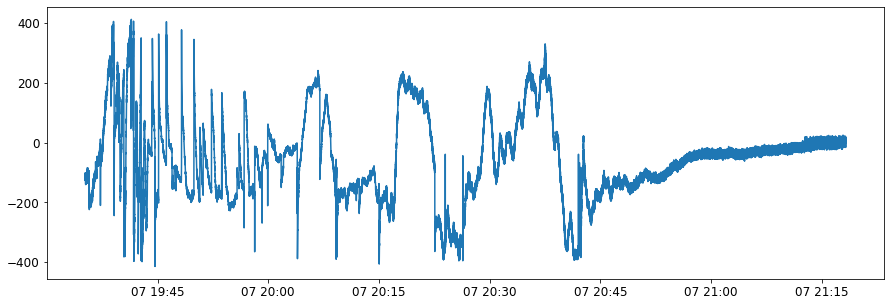

In [73]:
df.set_index('UTC', inplace=True, drop=False)
df.sort_index(inplace=True)
df[0] = pd.to_numeric(df[0])

plt.figure(figsize=(15,5))
plt.rc('font', size=12)    

plt.plot(df[0])


/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-48-35.mp4.csv


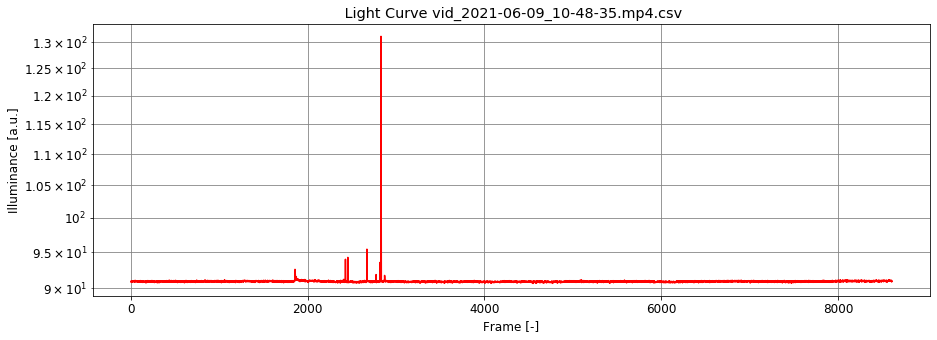

In [136]:
f = '/storage/experiments/2021/0807_bourka_sobeslav/video/1628430821.820973.mp4.csv'
time0 = '2021-08-07 19:53:42'
timediff = -1000 # ms

f = '/storage/experiments/2021/0807_bourka_sobeslav/video/1628431195.5110645.mp4.csv'
time0 = '2021-08-07 19:59:56'
timediff = -1000 # ms

f = '/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-48-35.mp4.csv'
time0 = '2021-06-09 10:48:35'
timediff = -1000 # ms

s = f.split('/')
st = s[len(s)-1]
print(f)
y = pd.read_csv(f)

plt.figure(figsize=(15,5))
plt.rc('font', size=12)    

plt.plot(y['0'], color='r')
plt.yscale('log')
plt.title(' Light Curve ' + st)
plt.xlabel('Frame [-]')
plt.ylabel('Illuminance [a.u.]')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
#plt.xticks(np.arange(0, 4000, 100))
#plt.ticklabel_format(style='sci', axis='y')


Text(0.5, 0, 'UTC')

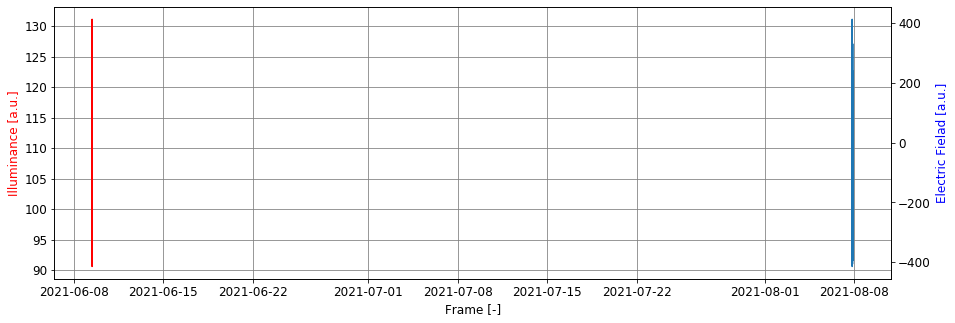

In [111]:
snap_time = 620 # us

yy = y

t0 = pd.to_datetime(time0)
time1st = t0  - pd.to_timedelta(1000, unit='ms')
yy['time'] = time1st + pd.to_timedelta(y.index * snap_time, unit='us') + pd.to_timedelta(timediff, unit='ms') 

#xx = df.loc['2021-08-07 19:59:50':'2021-08-07 20:00:00']
xx = df

yy.set_index('time', inplace=True, drop=False)
yy.sort_index(inplace=True)

plt.figure(figsize=(15,5))
plt.rc('font', size=12)    

plt.plot(yy['0'], color='red')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.xlabel('Frame [-]')
plt.ylabel('Illuminance [a.u.]', color='red')

plt.twinx()

plt.plot(xx[0], drawstyle='steps-post')
plt.ylabel('Electric Fielad [a.u.]', color='blue')
plt.xlabel('UTC')




(90, 105)

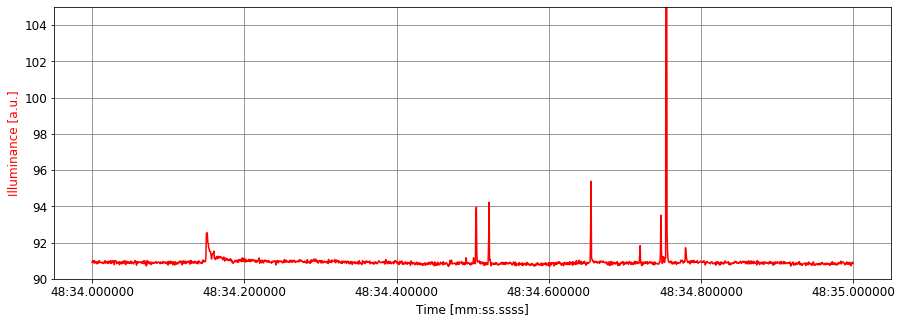

In [137]:
snap_time = 620 # us

yy = y

t0 = pd.to_datetime(time0)
time1st = t0  - pd.to_timedelta(1000, unit='ms')
yy['time'] = time1st + pd.to_timedelta(y.index * snap_time, unit='us') + pd.to_timedelta(timediff, unit='ms') 

yy.set_index('time', inplace=True, drop=False)
yy.sort_index(inplace=True)
yy = yy.loc['2021-06-09 10:48:34':'2021-06-09 10:48:34']

plt.figure(figsize=(15,5))
plt.rc('font', size=12)    

plt.plot(yy['0'], color='red')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.xlabel('Time [mm:ss.ssss]')
plt.ylabel('Illuminance [a.u.]', color='red')
plt.ylim(90,105)




Text(0.5, 0, 'UTC')

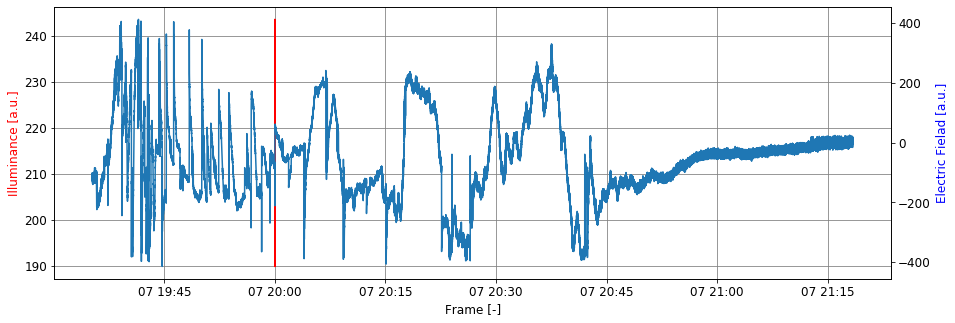

In [92]:
snap_time = 620 # us

yy = y

t0 = pd.to_datetime(time0)
time1st = t0  - pd.to_timedelta(1000, unit='ms')
yy['time'] = time1st + pd.to_timedelta(y.index * snap_time, unit='us') + pd.to_timedelta(timediff, unit='ms') 

xx = df.loc['2021-08-07 19:59:55':'2021-08-07 20:00:5']
xx = df

yy.set_index('time', inplace=True, drop=False)
yy.sort_index(inplace=True)

plt.figure(figsize=(15,5))
plt.rc('font', size=12)    

plt.plot(y['0'], color='red')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.xlabel('Frame [-]')
plt.ylabel('Illuminance [a.u.]', color='red')

plt.twinx()

plt.plot(xx[0])
plt.ylabel('Electric Fielad [a.u.]', color='blue')
plt.xlabel('UTC')




/storage/experiments/2021/0807_bourka_sobeslav/video/1628429742.3892598.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628429832.9127116.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628429929.155008.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430023.4697387.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430105.617505.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430254.7804074.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430372.7465947.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430616.798702.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430738.2769208.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430821.820973.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430961.7903373.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431195.5110645.mp4.csv
/storage/experiments/2021/0807_bourka_sobesl

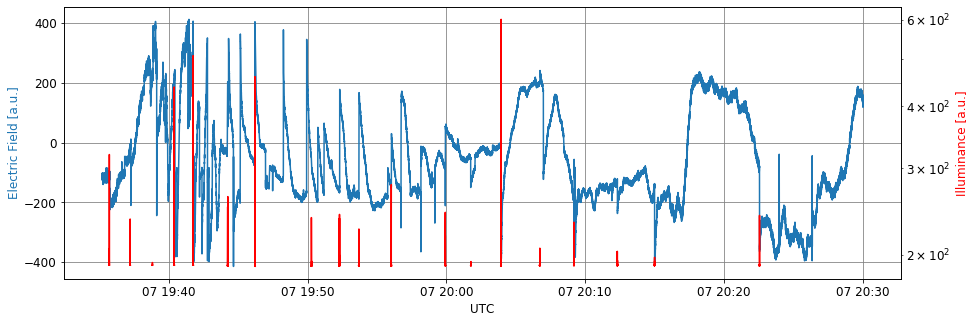

In [89]:
camera = [['/storage/experiments/2021/0807_bourka_sobeslav/video/1628429742.3892598.mp4','2021-08-07 19:35:42.822'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628429832.9127116.mp4','2021-08-07 19:37:13.390'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628429929.155008.mp4','2021-08-07 19:38:49.606'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430023.4697387.mp4','2021-08-07 19:40:23.894'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430105.617505.mp4','2021-08-07 19:41:46.096'],

['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430254.7804074.mp4','2021-08-07 19:44:15.210'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430372.7465947.mp4','2021-08-07 19:46:13.206'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430616.798702.mp4','2021-08-07 19:50:17.216'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430738.2769208.mp4','2021-08-07 19:52:18.000'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430821.820973.mp4','2021-08-07 19:53:42.295'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430961.7903373.mp4','2021-08-07 19:56:2.268'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431195.5110645.mp4','2021-08-07 19:59:56.015'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431939.2651453.mp4','2021-08-07 20:1:46.787'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431436.5650537.mp4','2021-08-07 20:3:57.004'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431603.790285.mp4','2021-08-07 20:6:44.208'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431751.8549378.mp4','2021-08-07 20:9:12.291'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431306.3418453.mp4','2021-08-07 20:12:19.737'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628432100.1519039.mp4','2021-08-07 20:15:0.592'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628432553.653221.mp4','2021-08-07 20:22:34.107']]


snap_time = 620 # us

xx = df.loc['2021-08-07 19:00:00':'2021-08-07 20:30:0']
#xx = df

plt.figure(figsize=(15,5))
plt.rc('font', size=12)    

plt.plot(xx[0])
plt.ylabel('Electric Field [a.u.]', c='#1f77b4')
plt.xlabel('UTC')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')

plt.twinx()

count = 0
for cam, tt in camera:
    f = cam + '.csv'
    time0 = tt

    timediff = -1200 # ms

    s = f.split('/')
    st = s[len(s)-1]
    print(f)
    y = pd.read_csv(f)

    t0 = pd.to_datetime(time0)
    time1st = t0  - pd.to_timedelta(1000, unit='ms')
    y['time'] = time1st + pd.to_timedelta(y.index * snap_time, unit='us') + pd.to_timedelta(timediff, unit='ms') 
    y.set_index('time', inplace=True, drop=False)
    y.sort_index(inplace=True)

    plt.yscale('log')
    if (count<5):
        plt.plot(y['0']*2+190, color='red')
    else:
        plt.plot(y['0'], color='red')
        
    count +=1
    
    plt.grid(b=True, which='major', color='grey', linestyle='-')
    plt.xlabel('UTC')
    plt.ylabel('Illuminance [a.u.]', color='red')


/storage/experiments/2021/0807_bourka_sobeslav/video/1628430254.7804074.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430372.7465947.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430616.798702.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430738.2769208.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430821.820973.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430961.7903373.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431195.5110645.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431939.2651453.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431436.5650537.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431603.790285.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431751.8549378.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431306.3418453.mp4.csv
/storage/experiments/2021/0807_bourka_sobes

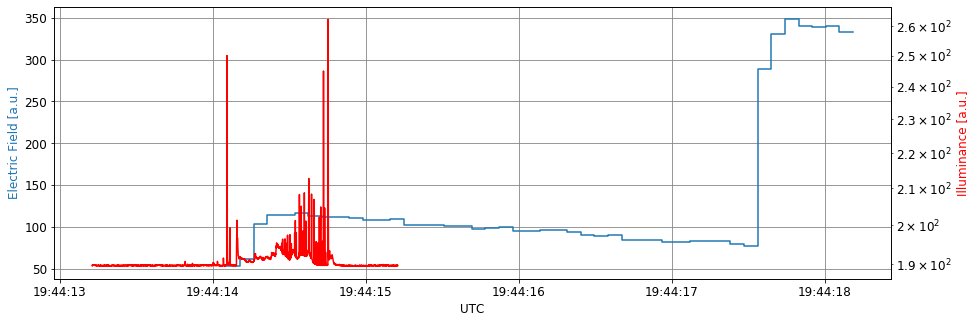

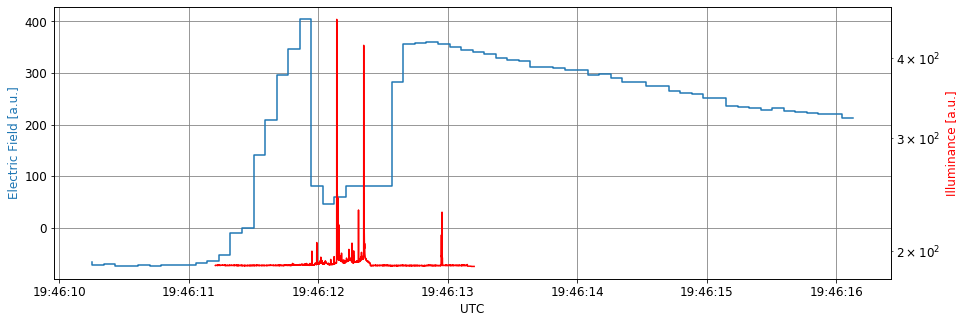

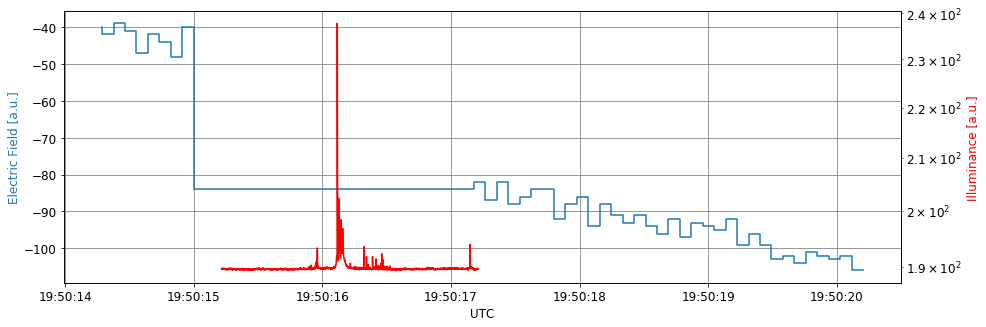

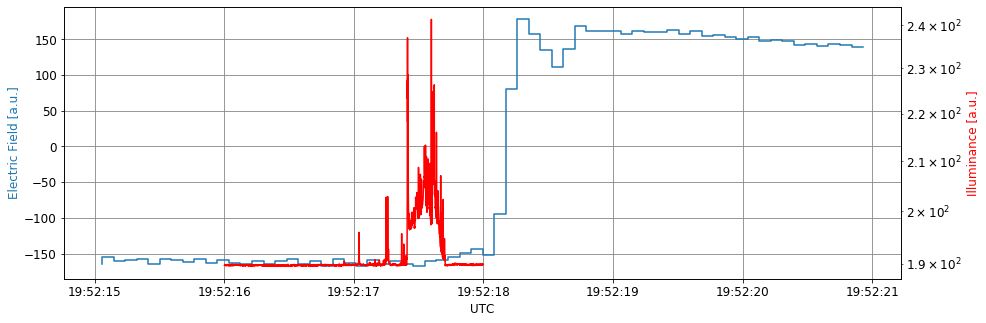

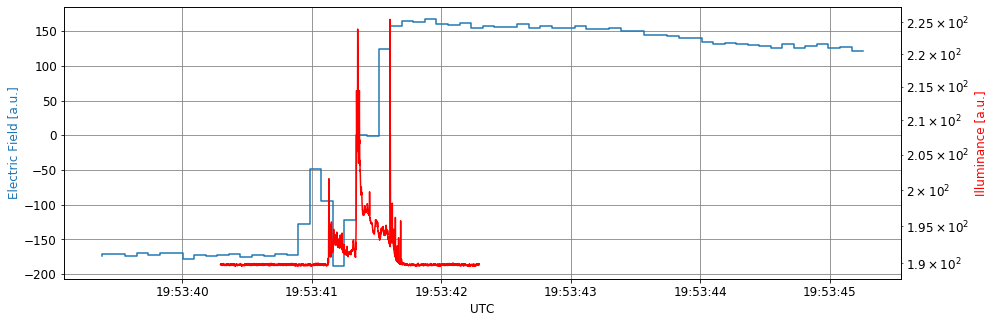

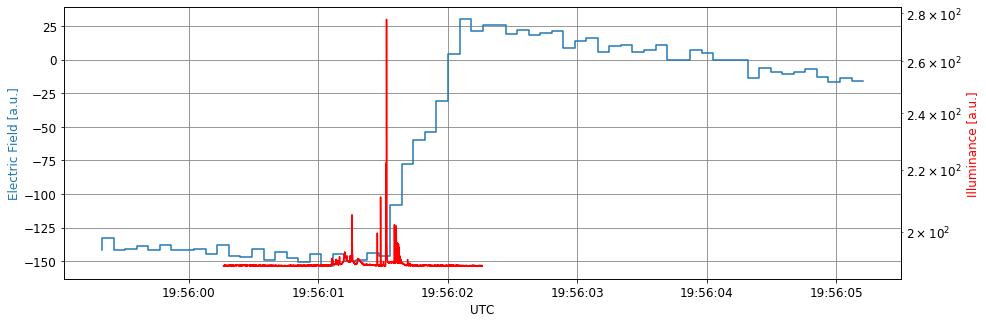

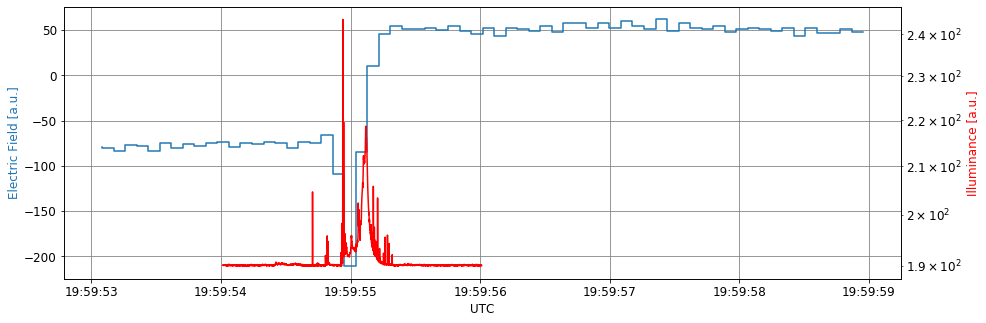

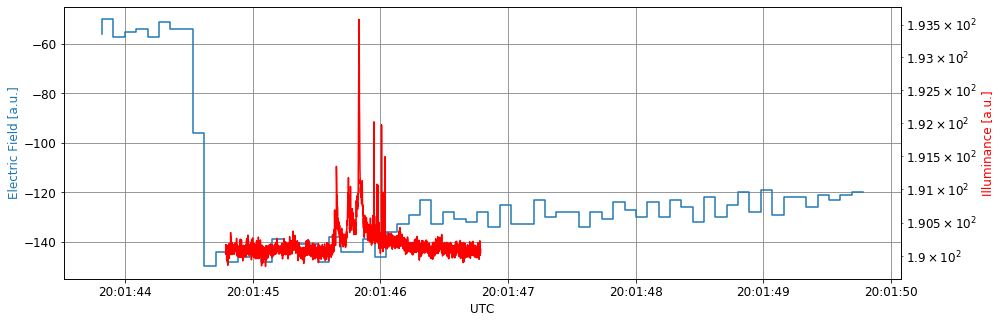

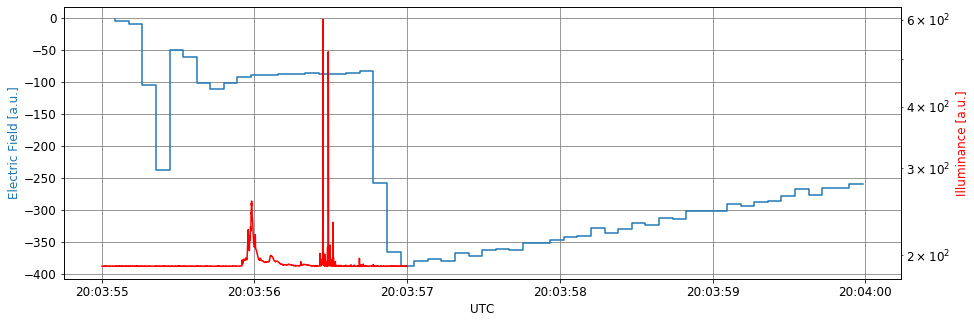

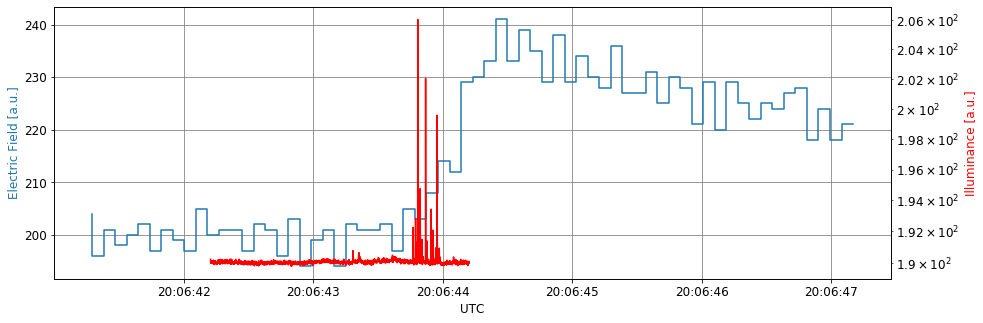

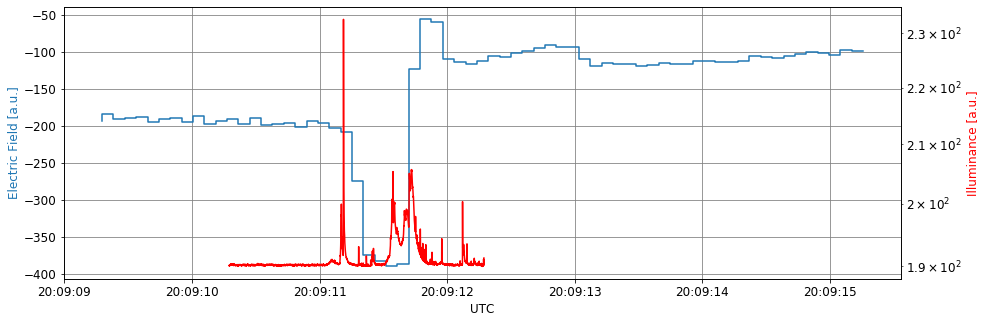

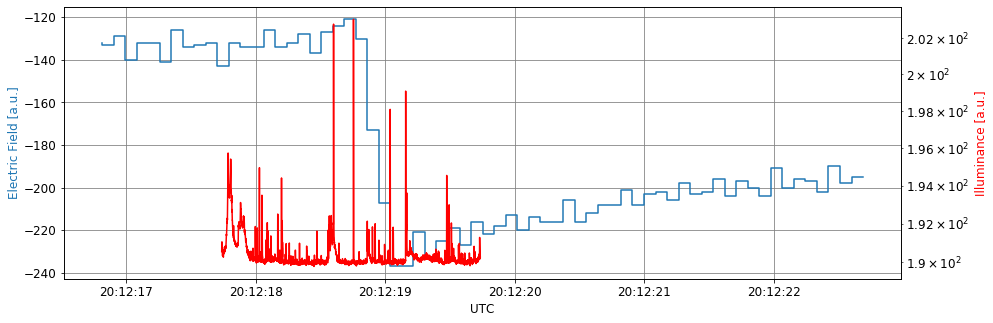

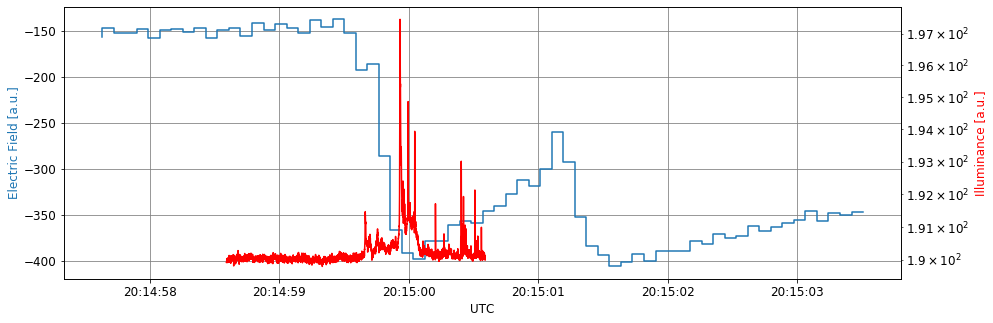

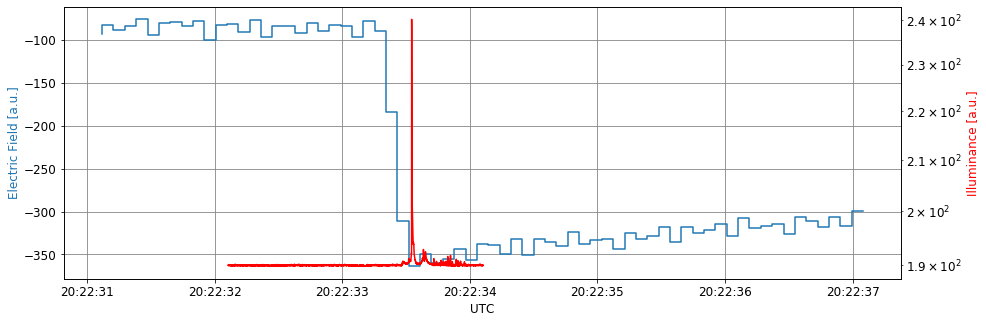

In [91]:
camera = [['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430254.7804074.mp4','2021-08-07 19:44:15.210'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430372.7465947.mp4','2021-08-07 19:46:13.206'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430616.798702.mp4','2021-08-07 19:50:17.216'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430738.2769208.mp4','2021-08-07 19:52:18.000'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430821.820973.mp4','2021-08-07 19:53:42.295'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430961.7903373.mp4','2021-08-07 19:56:2.268'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431195.5110645.mp4','2021-08-07 19:59:56.015'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431939.2651453.mp4','2021-08-07 20:1:46.787'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431436.5650537.mp4','2021-08-07 20:3:57.004'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431603.790285.mp4','2021-08-07 20:6:44.208'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431751.8549378.mp4','2021-08-07 20:9:12.291'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431306.3418453.mp4','2021-08-07 20:12:19.737'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628432100.1519039.mp4','2021-08-07 20:15:0.592'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628432553.653221.mp4','2021-08-07 20:22:34.107']]

snap_time = 620 # us

for cam, tt in camera:
    f = cam + '.csv'
    time0 = tt

    timediff = -1000 # ms

    s = f.split('/')
    st = s[len(s)-1]
    print(f)
    y = pd.read_csv(f)

    t0 = pd.to_datetime(time0)
    time1st = t0  - pd.to_timedelta(1000, unit='ms')
    y['time'] = time1st + pd.to_timedelta(y.index * snap_time, unit='us') + pd.to_timedelta(timediff, unit='ms') 
    y.set_index('time', inplace=True, drop=False)
    y.sort_index(inplace=True)

    plt.figure(figsize=(15,5))
    plt.rc('font', size=12)    

    xx = df.loc[df.index > t0 - pd.to_timedelta(3, unit='s')]
    xx = xx.loc[xx.index < t0 + pd.to_timedelta(3, unit='s')]

    plt.plot(xx[0], drawstyle='steps-pre')
    plt.ylabel('Electric Field [a.u.]', c='#1f77b4')
    plt.xlabel('UTC')
    plt.grid(b=True, which='major', color='grey', linestyle='-')
    plt.grid(b=True, which='minor', color='grey', linestyle='-')

    plt.twinx()
    
    plt.yscale('log')
    plt.plot(y['0'], color='red')
    plt.grid(b=True, which='major', color='grey', linestyle='-')
    plt.xlabel('UTC')
    plt.ylabel('Illuminance [a.u.]', color='red')
